# Assignment 3: NBA Finals 2023-2024 Insights – Mavericks vs Celtics

This notebook presents a comprehensive analysis and visualisation of player and team performance during the NBA Finals 2023-2024 between the Dallas Mavericks and the Boston Celtics.

---

### **Notebook Structure:**
The notebook includes the following sections:
##### **1. API** :
- Retrieved data using a free API provided by RapidAPI - API-Basketball website https://rapidapi.com/api-sports/api/api-basketball

- API key used: c3d8aa9a21msh7581db5aa693f61p1ab7fcjsnf0cdd2ef7be3
- Extracted relevant data specific to the championship finals between the Dallas Mavericks and Boston Celtics.
- Data stored in CSV format as NBA_Finals_2023_2024_API.csv

##### **2. Web Scraping:**
- Collected detailed box score data for the final 5 games from ESPN:

Game 1: https://www.espn.com.au/nba/boxscore/_/gameId/401656359

Game 2: https://www.espn.com.au/nba/game/_/gameId/401656360/mavericks-celtics

Game 3: https://www.espn.com.au/nba/game/_/gameId/401656361/celtics-mavericks

Game 4: https://www.espn.com.au/nba/game/_/gameId/401656362/celtics-mavericks

Game 5: https://www.espn.com.au/nba/game/_/gameId/401656363/mavericks-celtics

- Implemented all 3 web scraping techniques demonstrated in the week 6 tutorial:

Game 1: HTML parsing

Game 2: GET requests

Game 3: Table extraction

Game 4: GET requests

Game 5: GET requests

##### **3. Data Cleaning:**

- Cleaned each games dataset to retain relevant information, including: Player, MIN, FG, 3PT, FT, OREB, DREB, REB, AST, STL, BLK, TO, PF, +/-, PTS, Team, Role, Game

##### **4. Data Integration:**
- Combined individual game datasets to create comprehensive data sets:

Game 1: Maverick_dataset_1, Celtics_dataset_1, Combine_dataset_1

Game 2: Maverick_dataset_2, Celtics_dataset_2, Combine_dataset_2

Game 3: Maverick_dataset_3, Celtics_dataset_3, Combine_dataset_3

Game 4: Maverick_dataset_4, Celtics_dataset_4, Combine_dataset_4

Game 5: Maverick_dataset_5, Celtics_dataset_5, Combine_dataset_5

- Created full-series datasets:

Maverick_full_dataset: Combined data from all Mavericks games.

Celtics_full_dataset: Combined data from all Celtics games.

Full_series_dataset: Comprehensive combined dataset from all games with API dataset.

##### **5. Data Processing:**
- Performed further processing to prepare data for visualisation and analysis, such as aggregation, sorting, and filtering.

##### **6. Data Visualization:**
- Generated interactive and insightful visualisations to highlight key statistics and performance metrics for teams and players.

##### **7. OOP Principles:**

- Implemented Object-Oriented Programming (OOP) principles to create structured and reusable code.

##### **8. Unit Testing::**
- Developed unit tests to ensure data processing and cleaning functions work correctly, enhancing reliability and maintainability.
---

### **Contributors:**
- **Nhu Thanh Nguyen** – 25505569  
- **Andrew Fenelon** – 26100786  

---

###  **Course Details:**
- **Subject:** 94691 – Deep Learning  
- **Program:** Master of Data Science and Innovation  
- **Institution:** University of Technology Sydney (UTS)


## 1. API

In [349]:
# Set up API
import requests
import pandas as pd

url_teams = "https://api-basketball.p.rapidapi.com/teams"
url_games = "https://api-basketball.p.rapidapi.com/games"

headers = {
    "X-RapidAPI-Key": "c3d8aa9a21msh7581db5aa693f61p1ab7fcjsnf0cdd2ef7be3",
    "X-RapidAPI-Host": "api-basketball.p.rapidapi.com"
}

In [350]:
# Check the website/API
query_teams = {"league": "12", "season": "2023-2024"}
try:
    response_check = requests.get(url_teams, headers=headers, params=query_teams)
    response_check.raise_for_status()
    status = response_check.json()

    if status['errors']:
        print("Errors:", status['errors'])
    else:
        print("Good:", status['response'])

except requests.exceptions.RequestException as e:
    print("Error of API:", e)
    exit()

Good: [{'id': 132, 'name': 'Atlanta Hawks', 'logo': 'https://media.api-sports.io/basketball/teams/132.png', 'nationnal': False, 'country': {'id': 5, 'name': 'USA', 'code': 'US', 'flag': 'https://media.api-sports.io/flags/us.svg'}}, {'id': 133, 'name': 'Boston Celtics', 'logo': 'https://media.api-sports.io/basketball/teams/133.png', 'nationnal': False, 'country': {'id': 5, 'name': 'USA', 'code': 'US', 'flag': 'https://media.api-sports.io/flags/us.svg'}}, {'id': 134, 'name': 'Brooklyn Nets', 'logo': 'https://media.api-sports.io/basketball/teams/134.png', 'nationnal': False, 'country': {'id': 5, 'name': 'USA', 'code': 'US', 'flag': 'https://media.api-sports.io/flags/us.svg'}}, {'id': 135, 'name': 'Charlotte Hornets', 'logo': 'https://media.api-sports.io/basketball/teams/135.png', 'nationnal': False, 'country': {'id': 5, 'name': 'USA', 'code': 'US', 'flag': 'https://media.api-sports.io/flags/us.svg'}}, {'id': 136, 'name': 'Chicago Bulls', 'logo': 'https://media.api-sports.io/basketball/tea

In [351]:
# Find basketball team ID
import requests

url = "https://api-basketball.p.rapidapi.com/teams"
querystring = {"league":"12","season":"2023-2024"}

headers = {
    "X-RapidAPI-Key": "c3d8aa9a21msh7581db5aa693f61p1ab7fcjsnf0cdd2ef7be3",
    "X-RapidAPI-Host": "api-basketball.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
data = response.json()
teams = data['response']
for team in teams:
    print(f"Team: {team['name']} - ID: {team['id']}")

Team: Atlanta Hawks - ID: 132
Team: Boston Celtics - ID: 133
Team: Brooklyn Nets - ID: 134
Team: Charlotte Hornets - ID: 135
Team: Chicago Bulls - ID: 136
Team: Cleveland Cavaliers - ID: 137
Team: Dallas Mavericks - ID: 138
Team: Denver Nuggets - ID: 139
Team: Detroit Pistons - ID: 140
Team: East - ID: 1416
Team: Golden State Warriors - ID: 141
Team: Houston Rockets - ID: 142
Team: Indiana Pacers - ID: 143
Team: Los Angeles Clippers - ID: 144
Team: Los Angeles Lakers - ID: 145
Team: Memphis Grizzlies - ID: 146
Team: Miami Heat - ID: 147
Team: Milwaukee Bucks - ID: 148
Team: Minnesota Timberwolves - ID: 149
Team: New Orleans Pelicans - ID: 150
Team: New York Knicks - ID: 151
Team: Oklahoma City Thunder - ID: 152
Team: Orlando Magic - ID: 153
Team: Philadelphia 76ers - ID: 154
Team: Phoenix Suns - ID: 155
Team: Portland Trail Blazers - ID: 156
Team: Sacramento Kings - ID: 157
Team: San Antonio Spurs - ID: 158
Team: Toronto Raptors - ID: 159
Team: Utah Jazz - ID: 160
Team: Washington Wiza

In [352]:
# Team: Boston Celtics - ID: 133
# Team: Dallas Mavericks - ID: 138

import requests
import pandas as pd

url = "https://api-basketball.p.rapidapi.com/games"

querystring = {
    "season":"2023-2024",
    "league":"12"
}

headers = {
    "X-RapidAPI-Key": "c3d8aa9a21msh7581db5aa693f61p1ab7fcjsnf0cdd2ef7be3",
    "X-RapidAPI-Host": "api-basketball.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()

print(data)

games = data['response']
df_games = pd.json_normalize(games)
print(df_games.head())

{'get': 'games', 'parameters': {'league': '12', 'season': '2023-2024'}, 'errors': [], 'results': 1377, 'response': [{'id': 372186, 'date': '2023-10-05T16:00:00+00:00', 'time': '16:00', 'timestamp': 1696521600, 'timezone': 'UTC', 'stage': None, 'week': None, 'venue': 'Etihad Arena', 'status': {'long': 'Game Finished', 'short': 'FT', 'timer': None}, 'league': {'id': 12, 'name': 'NBA', 'type': 'League', 'season': '2023-2024', 'logo': 'https://media.api-sports.io/basketball/leagues/12.png'}, 'country': {'id': 5, 'name': 'USA', 'code': 'US', 'flag': 'https://media.api-sports.io/flags/us.svg'}, 'teams': {'home': {'id': 149, 'name': 'Minnesota Timberwolves', 'logo': 'https://media.api-sports.io/basketball/teams/149.png'}, 'away': {'id': 138, 'name': 'Dallas Mavericks', 'logo': 'https://media.api-sports.io/basketball/teams/138.png'}}, 'scores': {'home': {'quarter_1': 37, 'quarter_2': 29, 'quarter_3': 21, 'quarter_4': 24, 'over_time': None, 'total': 111}, 'away': {'quarter_1': 19, 'quarter_2': 

In [353]:
df_mav_celtics = df_games[
    ((df_games['teams.home.name'] == 'Dallas Mavericks') & (df_games['teams.away.name'] == 'Boston Celtics')) |
    ((df_games['teams.home.name'] == 'Boston Celtics') & (df_games['teams.away.name'] == 'Dallas Mavericks'))
]

print(df_mav_celtics)


          id                       date   time   timestamp timezone stage  \
696   372800  2024-01-23T01:30:00+00:00  01:30  1705973400      UTC  None   
946   373048  2024-03-02T00:30:00+00:00  00:30  1709339400      UTC  None   
1372  399891  2024-06-07T00:30:00+00:00  00:30  1717720200      UTC  None   
1373  399892  2024-06-10T00:00:00+00:00  00:00  1717977600      UTC  None   
1374  399893  2024-06-13T00:30:00+00:00  00:30  1718238600      UTC  None   
1375  399894  2024-06-15T00:30:00+00:00  00:30  1718411400      UTC  None   
1376  400924  2024-06-18T00:30:00+00:00  00:30  1718670600      UTC  None   

             week                              venue    status.long  \
696          None  American Airlines Center (Dallas)  Game Finished   
946          None                 TD Garden (Boston)  Game Finished   
1372  NBA - Final                          TD Garden  Game Finished   
1373  NBA - Final                          TD Garden  Game Finished   
1374  NBA - Final           

In [354]:
df_finals = df_mav_celtics[df_mav_celtics['week'] == 'NBA - Final']
print(df_finals.head())

          id                       date   time   timestamp timezone stage  \
1372  399891  2024-06-07T00:30:00+00:00  00:30  1717720200      UTC  None   
1373  399892  2024-06-10T00:00:00+00:00  00:00  1717977600      UTC  None   
1374  399893  2024-06-13T00:30:00+00:00  00:30  1718238600      UTC  None   
1375  399894  2024-06-15T00:30:00+00:00  00:30  1718411400      UTC  None   
1376  400924  2024-06-18T00:30:00+00:00  00:30  1718670600      UTC  None   

             week                     venue    status.long status.short  ...  \
1372  NBA - Final                 TD Garden  Game Finished           FT  ...   
1373  NBA - Final                 TD Garden  Game Finished           FT  ...   
1374  NBA - Final  American Airlines Center  Game Finished           FT  ...   
1375  NBA - Final  American Airlines Center  Game Finished           FT  ...   
1376  NBA - Final                 TD Garden  Game Finished           FT  ...   

     scores.home.quarter_3  scores.home.quarter_4 scores

In [355]:
df_finals.to_csv('NBA_Finals_2023_2024_API.csv', index=False)

## 2. Web-scarping

### Game 1 (static HTML)

In [356]:
# URL: https://www.espn.com.au/nba/boxscore/_/gameId/401656359
# Dowload the URL as HTML save as game1.html. Upload the html on GoogleColab

from bs4 import BeautifulSoup
import pandas as pd

with open('game1.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'lxml')

tables = soup.find_all('table')

team_tables = [(tables[1], tables[2]), (tables[3], tables[4])]
team_names = ["Dallas Mavericks", "Boston Celtics"]

players_stats = []

for idx, (names_table, stats_table) in enumerate(team_tables):
    df_names = pd.read_html(str(names_table))[0]
    df_stats = pd.read_html(str(stats_table))[0]

    df_names = df_names[~df_names.iloc[:, 0].isin(["TEAM", "Starters", "Bench"])].reset_index(drop=True)
    df_stats = df_stats.iloc[1:].reset_index(drop=True)

    min_len = min(len(df_names), len(df_stats))
    df_names, df_stats = df_names.head(min_len), df_stats.head(min_len)

    df_team = pd.concat([df_names, df_stats], axis=1)
    df_team["Team"] = team_names[idx]

    players_stats.append(df_team)

final_df_game1 = pd.concat(players_stats, ignore_index=True)
final_df_game1.rename(columns={final_df_game1.columns[0]: 'Player'}, inplace=True)

print(final_df_game1.head())

final_df_game1.to_csv('Game1_final_player_stats.csv', index=False)

                              Player Player      1     2    3  4   5   6  7  \
0                           starters     36   5-11   0-3  4-6  3   5   8  1   
1  P.J. WashingtonP.J. Washington#25     29    2-9   1-2  0-0  2   4   6  0   
2   Derrick Jones Jr.D. Jones Jr.#55     14    3-3   0-0  2-2  3   0   3  1   
3        Daniel GaffordD. Gafford#21     37   6-19   0-5  0-0  0   3   3  2   
4           Kyrie IrvingK. Irving#11     38  12-26  4-12  2-5  0  10  10  1   

   8  9 10 11   12  13   14              Team  
0  0  0  0  3  -15  14  NaN  Dallas Mavericks  
1  1  0  0  1  -12   5  NaN  Dallas Mavericks  
2  1  0  0  0  -10   8  NaN  Dallas Mavericks  
3  2  0  3  2  -19  12  NaN  Dallas Mavericks  
4  2  0  4  1  -10  30  NaN  Dallas Mavericks  


<ipython-input-356-3b086c3ec391>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_names = pd.read_html(str(names_table))[0]
<ipython-input-356-3b086c3ec391>:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stats = pd.read_html(str(stats_table))[0]
<ipython-input-356-3b086c3ec391>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_names = pd.read_html(str(names_table))[0]
<ipython-input-356-3b086c3ec391>:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stats = pd.read_html(str(stats

In [357]:
print(final_df_game1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  36 non-null     object
 1   Player  32 non-null     object
 2   1       36 non-null     object
 3   2       36 non-null     object
 4   3       36 non-null     object
 5   4       34 non-null     object
 6   5       34 non-null     object
 7   6       34 non-null     object
 8   7       34 non-null     object
 9   8       34 non-null     object
 10  9       34 non-null     object
 11  10      34 non-null     object
 12  11      34 non-null     object
 13  12      32 non-null     object
 14  13      34 non-null     object
 15  14      7 non-null      object
 16  Team    36 non-null     object
dtypes: object(17)
memory usage: 4.9+ KB
None


### Game 2 (requests.get)

In [358]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.espn.com.au/nba/boxscore/_/gameId/401656360"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all('table')

team_tables = [(tables[1], tables[2]), (tables[3], tables[4])]
team_names = ["Dallas Mavericks", "Boston Celtics"]

players_stats = []

for idx, (names_table, stats_table) in enumerate(team_tables):
    df_names = pd.read_html(str(names_table))[0]
    df_stats = pd.read_html(str(stats_table))[0]

    df_names = df_names[~df_names.iloc[:, 0].isin(["TEAM", "Starters", "Bench"])].reset_index(drop=True)
    df_stats = df_stats.iloc[1:].reset_index(drop=True)

    min_len = min(len(df_names), len(df_stats))
    df_names, df_stats = df_names.head(min_len), df_stats.head(min_len)

    df_team = pd.concat([df_names, df_stats], axis=1)
    df_team["Team"] = team_names[idx]

    players_stats.append(df_team)

final_df_game2 = pd.concat(players_stats, ignore_index=True)
final_df_game2.rename(columns={final_df_game2.columns[0]: 'Player'}, inplace=True)

print(final_df_game2.head())


                              Player Player      1    2    3  4   5   6   7  \
0                           starters     40   6-13  1-5  4-4  2   5   7   1   
1  P.J. WashingtonP.J. Washington#25     32    4-7  0-3  3-3  2   1   3   2   
2   Derrick Jones Jr.D. Jones Jr.#55     23    6-9  0-0  1-4  2   7   9   0   
3        Daniel GaffordD. Gafford#21     41   7-18  0-3  2-2  0   2   2   6   
4           Kyrie IrvingK. Irving#11     42  12-21  4-9  4-8  0  11  11  11   

   8  9 10 11  12  13   14              Team  
0  0  1  1  3  +2  17  NaN  Dallas Mavericks  
1  1  1  1  2  -5  11  NaN  Dallas Mavericks  
2  0  1  0  0   0  13  NaN  Dallas Mavericks  
3  0  0  2  4  -3  16  NaN  Dallas Mavericks  
4  4  0  8  1  -3  32  NaN  Dallas Mavericks  


<ipython-input-358-664d8dfda1c6>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_names = pd.read_html(str(names_table))[0]
<ipython-input-358-664d8dfda1c6>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stats = pd.read_html(str(stats_table))[0]
<ipython-input-358-664d8dfda1c6>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_names = pd.read_html(str(names_table))[0]
<ipython-input-358-664d8dfda1c6>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stats = pd.read_html(str(stats

In [359]:
print(final_df_game2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  36 non-null     object
 1   Player  32 non-null     object
 2   1       36 non-null     object
 3   2       36 non-null     object
 4   3       36 non-null     object
 5   4       34 non-null     object
 6   5       34 non-null     object
 7   6       34 non-null     object
 8   7       34 non-null     object
 9   8       34 non-null     object
 10  9       34 non-null     object
 11  10      34 non-null     object
 12  11      34 non-null     object
 13  12      32 non-null     object
 14  13      34 non-null     object
 15  14      12 non-null     object
 16  Team    36 non-null     object
dtypes: object(17)
memory usage: 4.9+ KB
None


In [360]:
final_df_game2.to_csv('Game2_final_player_stats.csv', index=False)

### Game 3 (table)

In [361]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_game3 = "https://www.espn.com.au/nba/boxscore/_/gameId/401656361"

headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url_game3, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all('table')

team_tables = [(tables[1], tables[2]), (tables[3], tables[4])]
team_names = ["Dallas Mavericks", "Boston Celtics"]

players_stats = []

for idx, (names_table, stats_table) in enumerate(team_tables):
    df_names = pd.read_html(str(names_table))[0]
    df_stats = pd.read_html(str(stats_table))[0]

    df_names = df_names[~df_names.iloc[:, 0].isin(["TEAM", "Starters", "Bench"])].reset_index(drop=True)
    df_stats = df_stats.iloc[1:].reset_index(drop=True)

    min_len = min(len(df_names), len(df_stats))
    df_names, df_stats = df_names.head(min_len), df_stats.head(min_len)

    df_team = pd.concat([df_names, df_stats], axis=1)
    df_team["Team"] = team_names[idx]

    players_stats.append(df_team)

final_df_game3 = pd.concat(players_stats, ignore_index=True)
final_df_game3.rename(columns={final_df_game3.columns[0]: 'Player'}, inplace=True)

print(final_df_game3.head())

                     Player Player      1     2    3  4  5  6  7  8  9 10 11  \
0                  starters     42  11-26  4-13  5-5  0  6  6  5  1  0  2  2   
1    Jayson TatumJ. Tatum#0     37    3-6   2-5  0-0  0  5  5  2  2  1  2  1   
2   Al HorfordA. Horford#42     42    4-9   1-3  0-0  3  1  4  5  1  0  0  4   
3  Jrue HolidayJ. Holiday#4     42   4-10   4-9  4-4  0  5  5  4  0  2  1  4   
4   Derrick WhiteD. White#9     41  12-22   2-9  4-5  1  7  8  8  0  1  3  3   

    12  13   14              Team  
0   -4  31  NaN  Dallas Mavericks  
1   -2   8  NaN  Dallas Mavericks  
2   +1   9  NaN  Dallas Mavericks  
3   +3  16  NaN  Dallas Mavericks  
4  +13  30  NaN  Dallas Mavericks  


<ipython-input-361-32c8e406f8fc>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_names = pd.read_html(str(names_table))[0]
<ipython-input-361-32c8e406f8fc>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stats = pd.read_html(str(stats_table))[0]
<ipython-input-361-32c8e406f8fc>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_names = pd.read_html(str(names_table))[0]
<ipython-input-361-32c8e406f8fc>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stats = pd.read_html(str(stats

In [362]:
final_df_game3.to_csv('Game3_final_player_stats.csv', index=False)

### Game 4 (requests.get)

In [363]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

url_game4 = "https://www.espn.com.au/nba/boxscore/_/gameId/401656362"

headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url_game4, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all('table')

team_tables = [(tables[1], tables[2]), (tables[3], tables[4])]
team_names = ["Dallas Mavericks", "Boston Celtics"]

players_stats = []

for idx, (names_table, stats_table) in enumerate(team_tables):
    df_names = pd.read_html(StringIO(str(names_table)))[0]
    df_stats = pd.read_html(StringIO(str(stats_table)))[0]


    df_names = df_names[~df_names.iloc[:, 0].isin(["TEAM", "Starters", "Bench"])].reset_index(drop=True)
    df_stats = df_stats.iloc[1:].reset_index(drop=True)


    min_len = min(len(df_names), len(df_stats))
    df_names, df_stats = df_names.iloc[:min_len].copy(), df_stats.iloc[:min_len].copy()


    df_names.reset_index(drop=True, inplace=True)
    df_stats.reset_index(drop=True, inplace=True)


    df_team = pd.concat([df_names, df_stats], axis=1)


    df_team.columns = [f"Col_{i}" for i in range(len(df_team.columns))]


    df_team.rename(columns={df_team.columns[0]: 'Player'}, inplace=True)
    df_team["Team"] = team_names[idx]
    players_stats.append(df_team)

final_df_game4 = pd.concat(players_stats, ignore_index=True)
print(final_df_game4.head())

                     Player Col_1 Col_2 Col_3 Col_4 Col_5 Col_6 Col_7 Col_8  \
0                  starters    27  4-10   1-4   6-6     0     5     5     3   
1    Jayson TatumJ. Tatum#0    23   1-1   1-1   0-0     1     2     3     4   
2   Al HorfordA. Horford#42    29  4-10   2-4   0-0     0     3     3     2   
3  Jrue HolidayJ. Holiday#4    31   2-8   2-8   0-0     0     4     4     1   
4   Derrick WhiteD. White#9    27  3-12   1-5   3-4     0     1     1     2   

  Col_9 Col_10 Col_11 Col_12 Col_13 Col_14 Col_15              Team  
0     1      2      3      4    -33     15    NaN  Dallas Mavericks  
1     1      0      1      3    -18      3    NaN  Dallas Mavericks  
2     0      1      5      1    -38     10    NaN  Dallas Mavericks  
3     0      0      0      2    -29      6    NaN  Dallas Mavericks  
4     0      0      2      3    -28     10    NaN  Dallas Mavericks  


In [364]:
print(final_df_game4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  36 non-null     object
 1   Col_1   32 non-null     object
 2   Col_2   36 non-null     object
 3   Col_3   36 non-null     object
 4   Col_4   36 non-null     object
 5   Col_5   34 non-null     object
 6   Col_6   34 non-null     object
 7   Col_7   34 non-null     object
 8   Col_8   34 non-null     object
 9   Col_9   34 non-null     object
 10  Col_10  34 non-null     object
 11  Col_11  34 non-null     object
 12  Col_12  34 non-null     object
 13  Col_13  32 non-null     object
 14  Col_14  34 non-null     object
 15  Col_15  1 non-null      object
 16  Team    36 non-null     object
dtypes: object(17)
memory usage: 4.9+ KB
None


In [365]:
final_df_game4.to_csv('Game4_final_player_stats.csv', index=False)

### Game 5 (requests.get)

In [366]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_game5 = "https://www.espn.com.au/nba/boxscore/_/gameId/401656363"

headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url_game5, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all('table')

team_tables = [(tables[1], tables[2]), (tables[3], tables[4])]
team_names = ["Dallas Mavericks", "Boston Celtics"]

players_stats = []

for idx, (names_table, stats_table) in enumerate(team_tables):
    df_names = pd.read_html(str(names_table))[0]
    df_stats = pd.read_html(str(stats_table))[0]

    df_names = df_names[~df_names.iloc[:, 0].isin(["TEAM", "Starters", "Bench"])].reset_index(drop=True)
    df_stats = df_stats.iloc[1:].reset_index(drop=True)

    min_len = min(len(df_names), len(df_stats))
    df_names, df_stats = df_names.head(min_len), df_stats.head(min_len)

    df_team = pd.concat([df_names, df_stats], axis=1)
    df_team["Team"] = team_names[idx]

    players_stats.append(df_team)

final_df_game5 = pd.concat(players_stats, ignore_index=True)
final_df_game5.rename(columns={final_df_game5.columns[0]: 'Player'}, inplace=True)

print(final_df_game5.head())


                              Player Player      1    2    3  4   5   6  7  8  \
0                           starters     34    2-7  0-5  0-0  0   6   6  3  0   
1  P.J. WashingtonP.J. Washington#25     22    4-8  1-4  1-2  0   0   0  0  0   
2   Derrick Jones Jr.D. Jones Jr.#55     11    3-5  0-0  0-0  2   1   3  0  0   
3        Daniel GaffordD. Gafford#21     41   5-16  3-9  2-2  1   2   3  9  1   
4           Kyrie IrvingK. Irving#11     43  12-25  2-9  2-5  0  12  12  5  3   

   9 10 11   12  13   14              Team  
0  2  4  3  -26   4  NaN  Dallas Mavericks  
1  1  0  0   -8  10  NaN  Dallas Mavericks  
2  0  0  1   -7   6  NaN  Dallas Mavericks  
3  0  1  2  -11  15  NaN  Dallas Mavericks  
4  0  7  3  -19  28  NaN  Dallas Mavericks  


<ipython-input-366-3eb7a1a1c0cb>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_names = pd.read_html(str(names_table))[0]
<ipython-input-366-3eb7a1a1c0cb>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stats = pd.read_html(str(stats_table))[0]
<ipython-input-366-3eb7a1a1c0cb>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_names = pd.read_html(str(names_table))[0]
<ipython-input-366-3eb7a1a1c0cb>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_stats = pd.read_html(str(stats

In [367]:
print(final_df_game5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  36 non-null     object
 1   Player  32 non-null     object
 2   1       36 non-null     object
 3   2       36 non-null     object
 4   3       36 non-null     object
 5   4       34 non-null     object
 6   5       34 non-null     object
 7   6       34 non-null     object
 8   7       34 non-null     object
 9   8       34 non-null     object
 10  9       34 non-null     object
 11  10      34 non-null     object
 12  11      34 non-null     object
 13  12      32 non-null     object
 14  13      34 non-null     object
 15  14      5 non-null      object
 16  Team    36 non-null     object
dtypes: object(17)
memory usage: 4.9+ KB
None


In [368]:
final_df_game5.to_csv('Game5_final_player_stats.csv', index=False)

## 3. Data Cleaning

### Game 1

In [369]:
df_game1 = pd.read_csv('Game1_final_player_stats.csv')
print(df_game1.head())
print(df_game1.info())

                              Player Player.1      1     2    3  4   5   6  7  \
0                           starters       36   5-11   0-3  4-6  3   5   8  1   
1  P.J. WashingtonP.J. Washington#25       29    2-9   1-2  0-0  2   4   6  0   
2   Derrick Jones Jr.D. Jones Jr.#55       14    3-3   0-0  2-2  3   0   3  1   
3        Daniel GaffordD. Gafford#21       37   6-19   0-5  0-0  0   3   3  2   
4           Kyrie IrvingK. Irving#11       38  12-26  4-12  2-5  0  10  10  1   

   8  9 10 11   12  13   14              Team  
0  0  0  0  3  -15  14  NaN  Dallas Mavericks  
1  1  0  0  1  -12   5  NaN  Dallas Mavericks  
2  1  0  0  0  -10   8  NaN  Dallas Mavericks  
3  2  0  3  2  -19  12  NaN  Dallas Mavericks  
4  2  0  4  1  -10  30  NaN  Dallas Mavericks  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Player    36 non-null     object
 1   Pla

In [370]:
print(df_game1.columns)

Index(['Player', 'Player.1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', 'Team'],
      dtype='object')


In [371]:
df_game1.columns = [
    'Player', 'MIN', 'FG', '3PT', 'FT',
    'OREB', 'DREB', 'REB', 'AST', 'STL',
    'BLK', 'TO', 'PF', '+/-', 'PTS', '14', 'Team'
]
df_game1 = df_game1.drop(columns=['14'])

print(df_game1.columns)
print(df_game1.head())

Index(['Player', 'MIN', 'FG', '3PT', 'FT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TO', 'PF', '+/-', 'PTS', 'Team'],
      dtype='object')
                              Player MIN     FG   3PT   FT OREB DREB REB AST  \
0                           starters  36   5-11   0-3  4-6    3    5   8   1   
1  P.J. WashingtonP.J. Washington#25  29    2-9   1-2  0-0    2    4   6   0   
2   Derrick Jones Jr.D. Jones Jr.#55  14    3-3   0-0  2-2    3    0   3   1   
3        Daniel GaffordD. Gafford#21  37   6-19   0-5  0-0    0    3   3   2   
4           Kyrie IrvingK. Irving#11  38  12-26  4-12  2-5    0   10  10   1   

  STL BLK TO PF  +/- PTS              Team  
0   0   0  0  3  -15  14  Dallas Mavericks  
1   1   0  0  1  -12   5  Dallas Mavericks  
2   1   0  0  0  -10   8  Dallas Mavericks  
3   2   0  3  2  -19  12  Dallas Mavericks  
4   2   0  4  1  -10  30  Dallas Mavericks  


In [372]:
print(df_game1.head(6))

                              Player  MIN     FG   3PT   FT  OREB  DREB  REB  \
0                           starters   36   5-11   0-3  4-6     3     5    8   
1  P.J. WashingtonP.J. Washington#25   29    2-9   1-2  0-0     2     4    6   
2   Derrick Jones Jr.D. Jones Jr.#55   14    3-3   0-0  2-2     3     0    3   
3        Daniel GaffordD. Gafford#21   37   6-19   0-5  0-0     0     3    3   
4           Kyrie IrvingK. Irving#11   38  12-26  4-12  2-5     0    10   10   
5            Luka DoncicL. Doncic#77  MIN     FG   3PT   FT  OREB  DREB  REB   

   AST  STL  BLK  TO  PF  +/-  PTS              Team  
0    1    0    0   0   3  -15   14  Dallas Mavericks  
1    0    1    0   0   1  -12    5  Dallas Mavericks  
2    1    1    0   0   0  -10    8  Dallas Mavericks  
3    2    2    0   3   2  -19   12  Dallas Mavericks  
4    1    2    0   4   1  -10   30  Dallas Mavericks  
5  AST  STL  BLK  TO  PF  +/-  PTS  Dallas Mavericks  


In [373]:
df_game1['Player'] = df_game1['Player'].shift(-1)

df_game1_cleaned = df_game1[:-1].copy()

print(df_game1_cleaned.head(10))

                               Player  MIN     FG   3PT   FT  OREB  DREB  REB  \
0   P.J. WashingtonP.J. Washington#25   36   5-11   0-3  4-6     3     5    8   
1    Derrick Jones Jr.D. Jones Jr.#55   29    2-9   1-2  0-0     2     4    6   
2         Daniel GaffordD. Gafford#21   14    3-3   0-0  2-2     3     0    3   
3            Kyrie IrvingK. Irving#11   37   6-19   0-5  0-0     0     3    3   
4             Luka DoncicL. Doncic#77   38  12-26  4-12  2-5     0    10   10   
5                               bench  MIN     FG   3PT   FT  OREB  DREB  REB   
6             Maxi KleberM. Kleber#42   19    1-1   0-0  0-0     0     0    0   
7  Tim Hardaway Jr.T. Hardaway Jr.#10    8    0-2   0-1  0-0     0     0    0   
8            Dwight PowellD. Powell#7    5    0-0   0-0  0-0     0     0    0   
9      Dereck Lively IID. Lively II#2   18    1-1   0-0  0-2     1     4    5   

   AST  STL  BLK  TO  PF  +/-  PTS              Team  
0    1    0    0   0   3  -15   14  Dallas Mavericks 

In [374]:
print(df_game1_cleaned.head(10))

                               Player  MIN     FG   3PT   FT  OREB  DREB  REB  \
0   P.J. WashingtonP.J. Washington#25   36   5-11   0-3  4-6     3     5    8   
1    Derrick Jones Jr.D. Jones Jr.#55   29    2-9   1-2  0-0     2     4    6   
2         Daniel GaffordD. Gafford#21   14    3-3   0-0  2-2     3     0    3   
3            Kyrie IrvingK. Irving#11   37   6-19   0-5  0-0     0     3    3   
4             Luka DoncicL. Doncic#77   38  12-26  4-12  2-5     0    10   10   
5                               bench  MIN     FG   3PT   FT  OREB  DREB  REB   
6             Maxi KleberM. Kleber#42   19    1-1   0-0  0-0     0     0    0   
7  Tim Hardaway Jr.T. Hardaway Jr.#10    8    0-2   0-1  0-0     0     0    0   
8            Dwight PowellD. Powell#7    5    0-0   0-0  0-0     0     0    0   
9      Dereck Lively IID. Lively II#2   18    1-1   0-0  0-2     1     4    5   

   AST  STL  BLK  TO  PF  +/-  PTS              Team  
0    1    0    0   0   3  -15   14  Dallas Mavericks 

In [375]:
df_game1_cleaned.replace("DNP-COACH'S DECISION", 0, inplace=True)
print(df_game1_cleaned.head(15))

                                  Player  MIN     FG   3PT   FT  OREB  DREB  \
0      P.J. WashingtonP.J. Washington#25   36   5-11   0-3  4-6     3     5   
1       Derrick Jones Jr.D. Jones Jr.#55   29    2-9   1-2  0-0     2     4   
2            Daniel GaffordD. Gafford#21   14    3-3   0-0  2-2     3     0   
3               Kyrie IrvingK. Irving#11   37   6-19   0-5  0-0     0     3   
4                Luka DoncicL. Doncic#77   38  12-26  4-12  2-5     0    10   
5                                  bench  MIN     FG   3PT   FT  OREB  DREB   
6                Maxi KleberM. Kleber#42   19    1-1   0-0  0-0     0     0   
7     Tim Hardaway Jr.T. Hardaway Jr.#10    8    0-2   0-1  0-0     0     0   
8               Dwight PowellD. Powell#7    5    0-0   0-0  0-0     0     0   
9         Dereck Lively IID. Lively II#2   18    1-1   0-0  0-2     1     4   
10                  Josh GreenJ. Green#8   20    1-4   1-1  0-0     1     2   
11                   Dante ExumD. Exum#0    5    0-0

In [376]:
# Split in 2 dataframe Maverick and Celtic in game 1
df_mavericks_game1 = df_game1_cleaned[df_game1_cleaned['Team'] == 'Dallas Mavericks'].reset_index(drop=True)
df_celtics_game1 = df_game1_cleaned[df_game1_cleaned['Team'] == 'Boston Celtics'].reset_index(drop=True)

print(df_mavericks_game1.head())
print(df_celtics_game1.head())

                              Player MIN     FG   3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  36   5-11   0-3  4-6    3    5   8   1   
1   Derrick Jones Jr.D. Jones Jr.#55  29    2-9   1-2  0-0    2    4   6   0   
2        Daniel GaffordD. Gafford#21  14    3-3   0-0  2-2    3    0   3   1   
3           Kyrie IrvingK. Irving#11  37   6-19   0-5  0-0    0    3   3   2   
4            Luka DoncicL. Doncic#77  38  12-26  4-12  2-5    0   10  10   1   

  STL BLK TO PF  +/- PTS              Team  
0   0   0  0  3  -15  14  Dallas Mavericks  
1   1   0  0  1  -12   5  Dallas Mavericks  
2   1   0  0  0  -10   8  Dallas Mavericks  
3   2   0  3  2  -19  12  Dallas Mavericks  
4   2   0  4  1  -10  30  Dallas Mavericks  
                     Player MIN    FG  3PT    FT OREB DREB REB AST STL BLK TO  \
0    Jayson TatumJ. Tatum#0  42  6-16  3-7   1-2    2    9  11   5   0   1  6   
1   Al HorfordA. Horford#42  30   4-8  2-5   0-0    2    5   7   3   0   2  0   
2  Jru

Maverick Game 1

In [377]:
df_mavericks_game1['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_mavericks_game1))]
print(df_mavericks_game1[['Player', 'Role']])


                                  Player      Role
0      P.J. WashingtonP.J. Washington#25  Starters
1       Derrick Jones Jr.D. Jones Jr.#55  Starters
2            Daniel GaffordD. Gafford#21  Starters
3               Kyrie IrvingK. Irving#11  Starters
4                Luka DoncicL. Doncic#77  Starters
5                                  bench     Bench
6                Maxi KleberM. Kleber#42     Bench
7     Tim Hardaway Jr.T. Hardaway Jr.#10     Bench
8               Dwight PowellD. Powell#7     Bench
9         Dereck Lively IID. Lively II#2     Bench
10                  Josh GreenJ. Green#8     Bench
11                   Dante ExumD. Exum#0     Bench
12                 Jaden HardyJ. Hardy#1     Bench
13           Markieff MorrisM. Morris#88     Bench
14  Olivier-Maxence ProsperO. Prosper#18     Bench
15              A.J. LawsonA.J. Lawson#9     Bench
16                                  team     Bench
17                              starters     Bench


In [378]:
df_mavericks_game1 = df_mavericks_game1[~df_mavericks_game1['Player'].str.contains('bench', case=False, na=False)].reset_index(drop=True)
print(df_mavericks_game1.head(10))

                               Player MIN     FG   3PT   FT OREB DREB REB AST  \
0   P.J. WashingtonP.J. Washington#25  36   5-11   0-3  4-6    3    5   8   1   
1    Derrick Jones Jr.D. Jones Jr.#55  29    2-9   1-2  0-0    2    4   6   0   
2         Daniel GaffordD. Gafford#21  14    3-3   0-0  2-2    3    0   3   1   
3            Kyrie IrvingK. Irving#11  37   6-19   0-5  0-0    0    3   3   2   
4             Luka DoncicL. Doncic#77  38  12-26  4-12  2-5    0   10  10   1   
5             Maxi KleberM. Kleber#42  19    1-1   0-0  0-0    0    0   0   1   
6  Tim Hardaway Jr.T. Hardaway Jr.#10   8    0-2   0-1  0-0    0    0   0   0   
7            Dwight PowellD. Powell#7   5    0-0   0-0  0-0    0    0   0   0   
8      Dereck Lively IID. Lively II#2  18    1-1   0-0  0-2    1    4   5   1   
9                Josh GreenJ. Green#8  20    1-4   1-1  0-0    1    2   3   0   

  STL BLK TO PF  +/- PTS              Team      Role  
0   0   0  0  3  -15  14  Dallas Mavericks  Starters 

In [379]:
df_mavericks_game1 = df_mavericks_game1[~df_mavericks_game1['Player'].str.contains('starters', case=False, na=False)].reset_index(drop=True)
print(df_mavericks_game1.head(22))

                                  Player  MIN     FG   3PT     FT OREB DREB  \
0      P.J. WashingtonP.J. Washington#25   36   5-11   0-3    4-6    3    5   
1       Derrick Jones Jr.D. Jones Jr.#55   29    2-9   1-2    0-0    2    4   
2            Daniel GaffordD. Gafford#21   14    3-3   0-0    2-2    3    0   
3               Kyrie IrvingK. Irving#11   37   6-19   0-5    0-0    0    3   
4                Luka DoncicL. Doncic#77   38  12-26  4-12    2-5    0   10   
5                Maxi KleberM. Kleber#42   19    1-1   0-0    0-0    0    0   
6     Tim Hardaway Jr.T. Hardaway Jr.#10    8    0-2   0-1    0-0    0    0   
7               Dwight PowellD. Powell#7    5    0-0   0-0    0-0    0    0   
8         Dereck Lively IID. Lively II#2   18    1-1   0-0    0-2    1    4   
9                   Josh GreenJ. Green#8   20    1-4   1-1    0-0    1    2   
10                   Dante ExumD. Exum#0    5    0-0   0-0    0-0    0    2   
11                 Jaden HardyJ. Hardy#1   11    4-8

In [380]:
df_mavericks_game1.loc[15, 'Player'] = "Team Maverick Total"
print(df_mavericks_game1.loc[15])

Player    Team Maverick Total
MIN                       NaN
FG                      35-84
3PT                      7-27
FT                      12-19
OREB                       10
DREB                       33
REB                        43
AST                         9
STL                         8
BLK                         1
TO                         11
PF                         16
+/-                       NaN
PTS                        89
Team         Dallas Mavericks
Role                    Bench
Name: 15, dtype: object


In [381]:
df_mavericks_game1['Game'] = 'Game 1'
print(df_mavericks_game1.head())

                              Player MIN     FG   3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  36   5-11   0-3  4-6    3    5   8   1   
1   Derrick Jones Jr.D. Jones Jr.#55  29    2-9   1-2  0-0    2    4   6   0   
2        Daniel GaffordD. Gafford#21  14    3-3   0-0  2-2    3    0   3   1   
3           Kyrie IrvingK. Irving#11  37   6-19   0-5  0-0    0    3   3   2   
4            Luka DoncicL. Doncic#77  38  12-26  4-12  2-5    0   10  10   1   

  STL BLK TO PF  +/- PTS              Team      Role    Game  
0   0   0  0  3  -15  14  Dallas Mavericks  Starters  Game 1  
1   1   0  0  1  -12   5  Dallas Mavericks  Starters  Game 1  
2   1   0  0  0  -10   8  Dallas Mavericks  Starters  Game 1  
3   2   0  3  2  -19  12  Dallas Mavericks  Starters  Game 1  
4   2   0  4  1  -10  30  Dallas Mavericks  Starters  Game 1  


In [382]:
df_mavericks_game1.fillna(0, inplace=True)
print(df_mavericks_game1.isnull().sum())


Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [383]:
df_mavericks_game1.to_csv('df_mavericks_game1.csv', index=False)

Celtics Game 1

In [384]:
df_celtics_game1['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_celtics_game1))]
print(df_celtics_game1[['Player', 'Role']])

                              Player      Role
0             Jayson TatumJ. Tatum#0  Starters
1            Al HorfordA. Horford#42  Starters
2           Jrue HolidayJ. Holiday#4  Starters
3            Derrick WhiteD. White#9  Starters
4             Jaylen BrownJ. Brown#7  Starters
5                              bench     Bench
6             Sam HauserS. Hauser#30     Bench
7       Oshae BrissettO. Brissett#12     Bench
8            Luke KornetL. Kornet#40     Bench
9   Kristaps PorzingisK. Porzingis#8     Bench
10   Payton PritchardP. Pritchard#11     Bench
11    Svi MykhailiukS. Mykhailiuk#50     Bench
12       Xavier TillmanX. Tillman#26     Bench
13          Neemias QuetaN. Queta#88     Bench
14      Jaden SpringerJ. Springer#44     Bench
15           Jordan WalshJ. Walsh#27     Bench
16                              team     Bench


In [385]:
df_celtics_game1 = df_celtics_game1[~df_celtics_game1['Player'].str.contains('bench', case=False, na=False)].reset_index(drop=True)
print(df_celtics_game1.head(22))

                              Player  MIN     FG    3PT     FT OREB DREB REB  \
0             Jayson TatumJ. Tatum#0   42   6-16    3-7    1-2    2    9  11   
1            Al HorfordA. Horford#42   30    4-8    2-5    0-0    2    5   7   
2           Jrue HolidayJ. Holiday#4   35    4-9    2-5    2-2    2    6   8   
3            Derrick WhiteD. White#9   35   5-11    3-8    2-2    1    1   2   
4             Jaylen BrownJ. Brown#7   37   7-12    2-6   6-11    1    5   6   
5             Sam HauserS. Hauser#30   16    3-4    2-2    0-0    0    4   4   
6       Oshae BrissettO. Brissett#12    3    0-0    0-0    0-0    0    0   0   
7            Luke KornetL. Kornet#40    3    1-1    0-0    0-0    1    0   1   
8   Kristaps PorzingisK. Porzingis#8   21   8-13    2-4    2-2    0    6   6   
9    Payton PritchardP. Pritchard#11   16    0-7    0-5    0-0    1    1   2   
10    Svi MykhailiukS. Mykhailiuk#50    3    1-1    0-0    0-0    0    0   0   
11       Xavier TillmanX. Tillman#26    

In [386]:
df_celtics_game1.loc[15, 'Player'] = "Team celtics Total"
print(df_celtics_game1.loc[15])

Player    Team celtics Total
MIN                      NaN
FG                     39-82
3PT                    16-42
FT                     13-19
OREB                      10
DREB                      37
REB                       47
AST                       23
STL                        6
BLK                        9
TO                        12
PF                        16
+/-                      NaN
PTS                      107
Team          Boston Celtics
Role                   Bench
Name: 15, dtype: object


In [387]:
df_celtics_game1['Game'] = 'Game 1'
print(df_celtics_game1.head())

                     Player MIN    FG  3PT    FT OREB DREB REB AST STL BLK TO  \
0    Jayson TatumJ. Tatum#0  42  6-16  3-7   1-2    2    9  11   5   0   1  6   
1   Al HorfordA. Horford#42  30   4-8  2-5   0-0    2    5   7   3   0   2  0   
2  Jrue HolidayJ. Holiday#4  35   4-9  2-5   2-2    2    6   8   5   1   0  0   
3   Derrick WhiteD. White#9  35  5-11  3-8   2-2    1    1   2   5   1   0  2   
4    Jaylen BrownJ. Brown#7  37  7-12  2-6  6-11    1    5   6   2   3   3  2   

  PF  +/- PTS            Team      Role    Game  
0  1  +19  16  Boston Celtics  Starters  Game 1  
1  0   +7  10  Boston Celtics  Starters  Game 1  
2  3  +20  12  Boston Celtics  Starters  Game 1  
3  3   +3  15  Boston Celtics  Starters  Game 1  
4  3  +12  22  Boston Celtics  Starters  Game 1  


In [388]:
df_celtics_game1.fillna(0, inplace=True)
print(df_celtics_game1.isnull().sum())


Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [389]:
df_celtics_game1.to_csv('df_celtics_game1.csv', index=False)

Combine game 1

In [390]:
df_combined_game1 = pd.concat([df_mavericks_game1, df_celtics_game1], ignore_index=True)
print(df_combined_game1.head(15))

                                  Player MIN     FG   3PT   FT OREB DREB REB  \
0      P.J. WashingtonP.J. Washington#25  36   5-11   0-3  4-6    3    5   8   
1       Derrick Jones Jr.D. Jones Jr.#55  29    2-9   1-2  0-0    2    4   6   
2            Daniel GaffordD. Gafford#21  14    3-3   0-0  2-2    3    0   3   
3               Kyrie IrvingK. Irving#11  37   6-19   0-5  0-0    0    3   3   
4                Luka DoncicL. Doncic#77  38  12-26  4-12  2-5    0   10  10   
5                Maxi KleberM. Kleber#42  19    1-1   0-0  0-0    0    0   0   
6     Tim Hardaway Jr.T. Hardaway Jr.#10   8    0-2   0-1  0-0    0    0   0   
7               Dwight PowellD. Powell#7   5    0-0   0-0  0-0    0    0   0   
8         Dereck Lively IID. Lively II#2  18    1-1   0-0  0-2    1    4   5   
9                   Josh GreenJ. Green#8  20    1-4   1-1  0-0    1    2   3   
10                   Dante ExumD. Exum#0   5    0-0   0-0  0-0    0    2   2   
11                 Jaden HardyJ. Hardy#1

In [391]:
df_combined_game1.to_csv('df_combined_game1.csv', index=False)

### Game 2

In [392]:
df_game2 = pd.read_csv('Game2_final_player_stats.csv')
print(df_game2.head())
print(df_game2.info())

                              Player Player.1      1    2    3  4   5   6   7  \
0                           starters       40   6-13  1-5  4-4  2   5   7   1   
1  P.J. WashingtonP.J. Washington#25       32    4-7  0-3  3-3  2   1   3   2   
2   Derrick Jones Jr.D. Jones Jr.#55       23    6-9  0-0  1-4  2   7   9   0   
3        Daniel GaffordD. Gafford#21       41   7-18  0-3  2-2  0   2   2   6   
4           Kyrie IrvingK. Irving#11       42  12-21  4-9  4-8  0  11  11  11   

   8  9 10 11  12  13   14              Team  
0  0  1  1  3  +2  17  NaN  Dallas Mavericks  
1  1  1  1  2  -5  11  NaN  Dallas Mavericks  
2  0  1  0  0   0  13  NaN  Dallas Mavericks  
3  0  0  2  4  -3  16  NaN  Dallas Mavericks  
4  4  0  8  1  -3  32  NaN  Dallas Mavericks  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Player    36 non-null     object
 1   Player.1 

In [393]:
print(df_game2.columns)

Index(['Player', 'Player.1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', 'Team'],
      dtype='object')


In [394]:
df_game2.columns = [
    'Player', 'MIN', 'FG', '3PT', 'FT',
    'OREB', 'DREB', 'REB', 'AST', 'STL',
    'BLK', 'TO', 'PF', '+/-', 'PTS', '14', 'Team'
]
df_game2 = df_game2.drop(columns=['14'])

print(df_game2.columns)
print(df_game2.head())

Index(['Player', 'MIN', 'FG', '3PT', 'FT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TO', 'PF', '+/-', 'PTS', 'Team'],
      dtype='object')
                              Player MIN     FG  3PT   FT OREB DREB REB AST  \
0                           starters  40   6-13  1-5  4-4    2    5   7   1   
1  P.J. WashingtonP.J. Washington#25  32    4-7  0-3  3-3    2    1   3   2   
2   Derrick Jones Jr.D. Jones Jr.#55  23    6-9  0-0  1-4    2    7   9   0   
3        Daniel GaffordD. Gafford#21  41   7-18  0-3  2-2    0    2   2   6   
4           Kyrie IrvingK. Irving#11  42  12-21  4-9  4-8    0   11  11  11   

  STL BLK TO PF +/- PTS              Team  
0   0   1  1  3  +2  17  Dallas Mavericks  
1   1   1  1  2  -5  11  Dallas Mavericks  
2   0   1  0  0   0  13  Dallas Mavericks  
3   0   0  2  4  -3  16  Dallas Mavericks  
4   4   0  8  1  -3  32  Dallas Mavericks  


In [395]:
df_game2['Player'] = df_game2['Player'].shift(-1)

df_game2_cleaned = df_game2[:-1].copy()

print(df_game2_cleaned.head(10))

                              Player  MIN     FG  3PT   FT  OREB  DREB  REB  \
0  P.J. WashingtonP.J. Washington#25   40   6-13  1-5  4-4     2     5    7   
1   Derrick Jones Jr.D. Jones Jr.#55   32    4-7  0-3  3-3     2     1    3   
2        Daniel GaffordD. Gafford#21   23    6-9  0-0  1-4     2     7    9   
3           Kyrie IrvingK. Irving#11   41   7-18  0-3  2-2     0     2    2   
4            Luka DoncicL. Doncic#77   42  12-21  4-9  4-8     0    11   11   
5                              bench  MIN     FG  3PT   FT  OREB  DREB  REB   
6            Maxi KleberM. Kleber#42   16    0-4  0-2  0-0     0     2    2   
7     Dereck Lively IID. Lively II#2   19    1-3  0-0  0-0     3     4    7   
8               Josh GreenJ. Green#8   14    1-4  0-3  2-3     0     1    1   
9                Dante ExumD. Exum#0   11    1-1  1-1  0-0     0     1    1   

   AST  STL  BLK  TO  PF  +/-  PTS              Team  
0    1    0    1   1   3   +2   17  Dallas Mavericks  
1    2    1    1   1

In [396]:
df_game2_cleaned.replace("DNP-COACH'S DECISION", 0, inplace=True)
print(df_game2_cleaned.head(15))

                                  Player  MIN     FG  3PT   FT  OREB  DREB  \
0      P.J. WashingtonP.J. Washington#25   40   6-13  1-5  4-4     2     5   
1       Derrick Jones Jr.D. Jones Jr.#55   32    4-7  0-3  3-3     2     1   
2            Daniel GaffordD. Gafford#21   23    6-9  0-0  1-4     2     7   
3               Kyrie IrvingK. Irving#11   41   7-18  0-3  2-2     0     2   
4                Luka DoncicL. Doncic#77   42  12-21  4-9  4-8     0    11   
5                                  bench  MIN     FG  3PT   FT  OREB  DREB   
6                Maxi KleberM. Kleber#42   16    0-4  0-2  0-0     0     2   
7         Dereck Lively IID. Lively II#2   19    1-3  0-0  0-0     3     4   
8                   Josh GreenJ. Green#8   14    1-4  0-3  2-3     0     1   
9                    Dante ExumD. Exum#0   11    1-1  1-1  0-0     0     1   
10                 Jaden HardyJ. Hardy#1    2    0-0  0-0  0-0     0     0   
11           Markieff MorrisM. Morris#88    0      0    0    0  

In [397]:
# Split in 2 dataframe Maverick and Celtic in game 2
df_mavericks_game2 = df_game2_cleaned[df_game2_cleaned['Team'] == 'Dallas Mavericks'].reset_index(drop=True)
df_celtics_game2 = df_game2_cleaned[df_game2_cleaned['Team'] == 'Boston Celtics'].reset_index(drop=True)

print(df_mavericks_game2.head())
print(df_celtics_game2.head())

                              Player MIN     FG  3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  40   6-13  1-5  4-4    2    5   7   1   
1   Derrick Jones Jr.D. Jones Jr.#55  32    4-7  0-3  3-3    2    1   3   2   
2        Daniel GaffordD. Gafford#21  23    6-9  0-0  1-4    2    7   9   0   
3           Kyrie IrvingK. Irving#11  41   7-18  0-3  2-2    0    2   2   6   
4            Luka DoncicL. Doncic#77  42  12-21  4-9  4-8    0   11  11  11   

  STL BLK TO PF +/- PTS              Team  
0   0   1  1  3  +2  17  Dallas Mavericks  
1   1   1  1  2  -5  11  Dallas Mavericks  
2   0   1  0  0   0  13  Dallas Mavericks  
3   0   0  2  4  -3  16  Dallas Mavericks  
4   4   0  8  1  -3  32  Dallas Mavericks  
                     Player MIN     FG   3PT   FT OREB DREB REB AST STL BLK  \
0    Jayson TatumJ. Tatum#0  45   6-22   1-7  5-6    1    8   9  12   1   0   
1   Al HorfordA. Horford#42  28    2-4   1-3  0-0    0    7   7   2   1   0   
2  Jrue HolidayJ. Holida

Maverick Game 2

In [398]:
df_mavericks_game2['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_mavericks_game2))]
print(df_mavericks_game2[['Player', 'Role']])

                                  Player      Role
0      P.J. WashingtonP.J. Washington#25  Starters
1       Derrick Jones Jr.D. Jones Jr.#55  Starters
2            Daniel GaffordD. Gafford#21  Starters
3               Kyrie IrvingK. Irving#11  Starters
4                Luka DoncicL. Doncic#77  Starters
5                                  bench     Bench
6                Maxi KleberM. Kleber#42     Bench
7         Dereck Lively IID. Lively II#2     Bench
8                   Josh GreenJ. Green#8     Bench
9                    Dante ExumD. Exum#0     Bench
10                 Jaden HardyJ. Hardy#1     Bench
11           Markieff MorrisM. Morris#88     Bench
12  Olivier-Maxence ProsperO. Prosper#18     Bench
13    Tim Hardaway Jr.T. Hardaway Jr.#10     Bench
14              Dwight PowellD. Powell#7     Bench
15              A.J. LawsonA.J. Lawson#9     Bench
16                                  team     Bench
17                              starters     Bench


In [399]:
df_mavericks_game2 = df_mavericks_game2[~df_mavericks_game2['Player'].str.contains('bench', case=False, na=False)].reset_index(drop=True)
df_mavericks_game2 = df_mavericks_game2[~df_mavericks_game2['Player'].str.contains('starters', case=False, na=False)].reset_index(drop=True)
print(df_mavericks_game2.head(20))

                                  Player  MIN     FG   3PT     FT OREB DREB  \
0      P.J. WashingtonP.J. Washington#25   40   6-13   1-5    4-4    2    5   
1       Derrick Jones Jr.D. Jones Jr.#55   32    4-7   0-3    3-3    2    1   
2            Daniel GaffordD. Gafford#21   23    6-9   0-0    1-4    2    7   
3               Kyrie IrvingK. Irving#11   41   7-18   0-3    2-2    0    2   
4                Luka DoncicL. Doncic#77   42  12-21   4-9    4-8    0   11   
5                Maxi KleberM. Kleber#42   16    0-4   0-2    0-0    0    2   
6         Dereck Lively IID. Lively II#2   19    1-3   0-0    0-0    3    4   
7                   Josh GreenJ. Green#8   14    1-4   0-3    2-3    0    1   
8                    Dante ExumD. Exum#0   11    1-1   1-1    0-0    0    1   
9                  Jaden HardyJ. Hardy#1    2    0-0   0-0    0-0    0    0   
10           Markieff MorrisM. Morris#88    0      0     0      0    0    0   
11  Olivier-Maxence ProsperO. Prosper#18    0      0

In [400]:
df_mavericks_game2['Game'] = 'Game 2'
print(df_mavericks_game2.head())

                              Player MIN     FG  3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  40   6-13  1-5  4-4    2    5   7   1   
1   Derrick Jones Jr.D. Jones Jr.#55  32    4-7  0-3  3-3    2    1   3   2   
2        Daniel GaffordD. Gafford#21  23    6-9  0-0  1-4    2    7   9   0   
3           Kyrie IrvingK. Irving#11  41   7-18  0-3  2-2    0    2   2   6   
4            Luka DoncicL. Doncic#77  42  12-21  4-9  4-8    0   11  11  11   

  STL BLK TO PF +/- PTS              Team      Role    Game  
0   0   1  1  3  +2  17  Dallas Mavericks  Starters  Game 2  
1   1   1  1  2  -5  11  Dallas Mavericks  Starters  Game 2  
2   0   1  0  0   0  13  Dallas Mavericks  Starters  Game 2  
3   0   0  2  4  -3  16  Dallas Mavericks  Starters  Game 2  
4   4   0  8  1  -3  32  Dallas Mavericks  Starters  Game 2  


In [401]:
df_mavericks_game2.loc[15, 'Player'] = "Team Maverick Total"
print(df_mavericks_game2.loc[15])

Player    Team Maverick Total
MIN                       NaN
FG                      38-80
3PT                      6-26
FT                      16-24
OREB                        9
DREB                       34
REB                        43
AST                        21
STL                         5
BLK                         3
TO                         15
PF                         17
+/-                       NaN
PTS                        98
Team         Dallas Mavericks
Role                    Bench
Game                   Game 2
Name: 15, dtype: object


In [402]:
df_mavericks_game2.fillna(0, inplace=True)
print(df_mavericks_game2.isnull().sum())

Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [403]:
df_mavericks_game2.to_csv('df_mavericks_game2.csv', index=False)

Celtics game 2

In [404]:
df_celtics_game2['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_celtics_game2))]
print(df_celtics_game2[['Player', 'Role']])

                              Player      Role
0             Jayson TatumJ. Tatum#0  Starters
1            Al HorfordA. Horford#42  Starters
2           Jrue HolidayJ. Holiday#4  Starters
3            Derrick WhiteD. White#9  Starters
4             Jaylen BrownJ. Brown#7  Starters
5                              bench     Bench
6             Sam HauserS. Hauser#30     Bench
7   Kristaps PorzingisK. Porzingis#8     Bench
8    Payton PritchardP. Pritchard#11     Bench
9        Xavier TillmanX. Tillman#26     Bench
10      Oshae BrissettO. Brissett#12     Bench
11           Luke KornetL. Kornet#40     Bench
12          Neemias QuetaN. Queta#88     Bench
13    Svi MykhailiukS. Mykhailiuk#50     Bench
14      Jaden SpringerJ. Springer#44     Bench
15           Jordan WalshJ. Walsh#27     Bench
16                              team     Bench


In [405]:
df_celtics_game2 = df_celtics_game2[~df_celtics_game2['Player'].str.contains('bench', case=False, na=False)].reset_index(drop=True)
print(df_celtics_game2.head(22))

                              Player  MIN     FG    3PT     FT OREB DREB REB  \
0             Jayson TatumJ. Tatum#0   45   6-22    1-7    5-6    1    8   9   
1            Al HorfordA. Horford#42   28    2-4    1-3    0-0    0    7   7   
2           Jrue HolidayJ. Holiday#4   41  11-14    2-4    2-2    4    7  11   
3            Derrick WhiteD. White#9   38   6-15   4-10    2-2    2    3   5   
4             Jaylen BrownJ. Brown#7   42   8-15    1-5    4-4    2    2   4   
5             Sam HauserS. Hauser#30   10    0-5    0-5    2-2    0    0   0   
6   Kristaps PorzingisK. Porzingis#8   23    4-7    0-3    4-4    0    4   4   
7    Payton PritchardP. Pritchard#11   12    1-2    1-2    0-0    1    0   1   
8        Xavier TillmanX. Tillman#26    0      0      0      0    0    0   0   
9       Oshae BrissettO. Brissett#12    0      0      0      0    0    0   0   
10           Luke KornetL. Kornet#40    0      0      0      0    0    0   0   
11          Neemias QuetaN. Queta#88    

In [406]:
df_celtics_game2['Game'] = 'Game 2'
print(df_celtics_game2.head())

                     Player MIN     FG   3PT   FT OREB DREB REB AST STL BLK  \
0    Jayson TatumJ. Tatum#0  45   6-22   1-7  5-6    1    8   9  12   1   0   
1   Al HorfordA. Horford#42  28    2-4   1-3  0-0    0    7   7   2   1   0   
2  Jrue HolidayJ. Holiday#4  41  11-14   2-4  2-2    4    7  11   3   1   1   
3   Derrick WhiteD. White#9  38   6-15  4-10  2-2    2    3   5   2   3   2   
4    Jaylen BrownJ. Brown#7  42   8-15   1-5  4-4    2    2   4   7   3   0   

  TO PF +/- PTS            Team      Role    Game  
0  3  2  +6  18  Boston Celtics  Starters  Game 2  
1  0  2  +1   5  Boston Celtics  Starters  Game 2  
2  0  3  +6  26  Boston Celtics  Starters  Game 2  
3  1  2  +8  18  Boston Celtics  Starters  Game 2  
4  6  3  -3  21  Boston Celtics  Starters  Game 2  


In [407]:
df_celtics_game2.loc[15, 'Player'] = "Team celtics Total"
print(df_celtics_game2.loc[15])

Player    Team celtics Total
MIN                      NaN
FG                     38-84
3PT                    10-39
FT                     19-20
OREB                      10
DREB                      31
REB                       41
AST                       29
STL                       10
BLK                        5
TO                        10
PF                        15
+/-                      NaN
PTS                      105
Team          Boston Celtics
Role                   Bench
Game                  Game 2
Name: 15, dtype: object


In [408]:
df_celtics_game2.fillna(0, inplace=True)
print(df_celtics_game2.isnull().sum())

Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [409]:
df_celtics_game2.to_csv('df_celtics_game2.csv', index=False)

Combine game 2

In [410]:
df_combined_game2 = pd.concat([df_mavericks_game2, df_celtics_game2], ignore_index=True)
print(df_combined_game2.head(14))

                                  Player MIN     FG  3PT   FT OREB DREB REB  \
0      P.J. WashingtonP.J. Washington#25  40   6-13  1-5  4-4    2    5   7   
1       Derrick Jones Jr.D. Jones Jr.#55  32    4-7  0-3  3-3    2    1   3   
2            Daniel GaffordD. Gafford#21  23    6-9  0-0  1-4    2    7   9   
3               Kyrie IrvingK. Irving#11  41   7-18  0-3  2-2    0    2   2   
4                Luka DoncicL. Doncic#77  42  12-21  4-9  4-8    0   11  11   
5                Maxi KleberM. Kleber#42  16    0-4  0-2  0-0    0    2   2   
6         Dereck Lively IID. Lively II#2  19    1-3  0-0  0-0    3    4   7   
7                   Josh GreenJ. Green#8  14    1-4  0-3  2-3    0    1   1   
8                    Dante ExumD. Exum#0  11    1-1  1-1  0-0    0    1   1   
9                  Jaden HardyJ. Hardy#1   2    0-0  0-0  0-0    0    0   0   
10           Markieff MorrisM. Morris#88   0      0    0    0    0    0   0   
11  Olivier-Maxence ProsperO. Prosper#18   0      0 

In [411]:
print(df_combined_game2.head(25))

                                  Player MIN     FG   3PT     FT OREB DREB  \
0      P.J. WashingtonP.J. Washington#25  40   6-13   1-5    4-4    2    5   
1       Derrick Jones Jr.D. Jones Jr.#55  32    4-7   0-3    3-3    2    1   
2            Daniel GaffordD. Gafford#21  23    6-9   0-0    1-4    2    7   
3               Kyrie IrvingK. Irving#11  41   7-18   0-3    2-2    0    2   
4                Luka DoncicL. Doncic#77  42  12-21   4-9    4-8    0   11   
5                Maxi KleberM. Kleber#42  16    0-4   0-2    0-0    0    2   
6         Dereck Lively IID. Lively II#2  19    1-3   0-0    0-0    3    4   
7                   Josh GreenJ. Green#8  14    1-4   0-3    2-3    0    1   
8                    Dante ExumD. Exum#0  11    1-1   1-1    0-0    0    1   
9                  Jaden HardyJ. Hardy#1   2    0-0   0-0    0-0    0    0   
10           Markieff MorrisM. Morris#88   0      0     0      0    0    0   
11  Olivier-Maxence ProsperO. Prosper#18   0      0     0      0

In [412]:
df_combined_game2.to_csv('df_combined_game2.csv', index=False)

### Game 3

In [413]:
df_game3 = pd.read_csv('Game3_final_player_stats.csv')
print(df_game3.head())
print(df_game3.info())

                     Player Player.1      1     2    3  4  5  6  7  8  9 10  \
0                  starters       42  11-26  4-13  5-5  0  6  6  5  1  0  2   
1    Jayson TatumJ. Tatum#0       37    3-6   2-5  0-0  0  5  5  2  2  1  2   
2   Al HorfordA. Horford#42       42    4-9   1-3  0-0  3  1  4  5  1  0  0   
3  Jrue HolidayJ. Holiday#4       42   4-10   4-9  4-4  0  5  5  4  0  2  1   
4   Derrick WhiteD. White#9       41  12-22   2-9  4-5  1  7  8  8  0  1  3   

  11   12  13   14              Team  
0  2   -4  31  NaN  Dallas Mavericks  
1  1   -2   8  NaN  Dallas Mavericks  
2  4   +1   9  NaN  Dallas Mavericks  
3  4   +3  16  NaN  Dallas Mavericks  
4  3  +13  30  NaN  Dallas Mavericks  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Player    35 non-null     object
 1   Player.1  31 non-null     object
 2   1         35 non-null     objec

In [414]:
print(df_game3.columns)

Index(['Player', 'Player.1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', 'Team'],
      dtype='object')


In [415]:
df_game3.columns = [
    'Player', 'MIN', 'FG', '3PT', 'FT',
    'OREB', 'DREB', 'REB', 'AST', 'STL',
    'BLK', 'TO', 'PF', '+/-', 'PTS', '14', 'Team'
]
df_game3 = df_game3.drop(columns=['14'])

print(df_game3.columns)
print(df_game3.head())

Index(['Player', 'MIN', 'FG', '3PT', 'FT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TO', 'PF', '+/-', 'PTS', 'Team'],
      dtype='object')
                     Player MIN     FG   3PT   FT OREB DREB REB AST STL BLK  \
0                  starters  42  11-26  4-13  5-5    0    6   6   5   1   0   
1    Jayson TatumJ. Tatum#0  37    3-6   2-5  0-0    0    5   5   2   2   1   
2   Al HorfordA. Horford#42  42    4-9   1-3  0-0    3    1   4   5   1   0   
3  Jrue HolidayJ. Holiday#4  42   4-10   4-9  4-4    0    5   5   4   0   2   
4   Derrick WhiteD. White#9  41  12-22   2-9  4-5    1    7   8   8   0   1   

  TO PF  +/- PTS              Team  
0  2  2   -4  31  Dallas Mavericks  
1  2  1   -2   8  Dallas Mavericks  
2  0  4   +1   9  Dallas Mavericks  
3  1  4   +3  16  Dallas Mavericks  
4  3  3  +13  30  Dallas Mavericks  


In [416]:
df_game3['Player'] = df_game3['Player'].shift(-1)

df_game3_cleaned = df_game3[:-1].copy()

print(df_game3_cleaned.head(10))

                            Player                   MIN  \
0           Jayson TatumJ. Tatum#0                    42   
1          Al HorfordA. Horford#42                    37   
2         Jrue HolidayJ. Holiday#4                    42   
3          Derrick WhiteD. White#9                    42   
4           Jaylen BrownJ. Brown#7                    41   
5                            bench                   MIN   
6      Xavier TillmanX. Tillman#26                    11   
7           Sam HauserS. Hauser#30                    14   
8  Payton PritchardP. Pritchard#11                    11   
9     Oshae BrissettO. Brissett#12  DNP-COACH'S DECISION   

                     FG                   3PT                    FT  \
0                 11-26                  4-13                   5-5   
1                   3-6                   2-5                   0-0   
2                   4-9                   1-3                   0-0   
3                  4-10                   4-9          

In [417]:
df_game3_cleaned.replace("DNP-COACH'S DECISION", 0, inplace=True)
print(df_game3_cleaned.head(15))

                             Player  MIN     FG   3PT   FT  OREB  DREB  REB  \
0            Jayson TatumJ. Tatum#0   42  11-26  4-13  5-5     0     6    6   
1           Al HorfordA. Horford#42   37    3-6   2-5  0-0     0     5    5   
2          Jrue HolidayJ. Holiday#4   42    4-9   1-3  0-0     3     1    4   
3           Derrick WhiteD. White#9   42   4-10   4-9  4-4     0     5    5   
4            Jaylen BrownJ. Brown#7   41  12-22   2-9  4-5     1     7    8   
5                             bench  MIN     FG   3PT   FT  OREB  DREB  REB   
6       Xavier TillmanX. Tillman#26   11    1-1   1-1  0-0     1     3    4   
7            Sam HauserS. Hauser#30   14    3-4   3-4  0-0     1     2    3   
8   Payton PritchardP. Pritchard#11   11    0-4   0-2  0-0     0     1    1   
9      Oshae BrissettO. Brissett#12    0      0     0    0     0     0    0   
10          Luke KornetL. Kornet#40    0      0     0    0     0     0    0   
11         Neemias QuetaN. Queta#88    0      0     

In [418]:
# Split in 2 dataframe Maverick and Celtic in game 3
df_mavericks_game3 = df_game3_cleaned[df_game3_cleaned['Team'] == 'Boston Celtics'].reset_index(drop=True)
df_celtics_game3 = df_game3_cleaned[df_game3_cleaned['Team'] == 'Dallas Mavericks'].reset_index(drop=True)

print(df_mavericks_game3.head())
print(df_celtics_game3.head())

                              Player MIN     FG  3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  39    3-9  3-6  4-6    1    7   8   2   
1   Derrick Jones Jr.D. Jones Jr.#55  16    1-2  0-1  0-0    1    2   3   1   
2        Daniel GaffordD. Gafford#21  16    3-3  0-0  0-0    1    2   3   1   
3           Kyrie IrvingK. Irving#11  45  13-28  4-6  5-5    0    3   3   2   
4            Luka DoncicL. Doncic#77  38  11-27  1-7  4-4    0    6   6   6   

  STL BLK TO PF  +/- PTS            Team  
0   0   0  2  3    0  13  Boston Celtics  
1   1   0  0  0   -6   2  Boston Celtics  
2   0   1  0  2  -11   6  Boston Celtics  
3   0   0  2  3   -3  35  Boston Celtics  
4   1   0  3  6   +9  27  Boston Celtics  
                     Player MIN     FG   3PT   FT OREB DREB REB AST STL BLK  \
0    Jayson TatumJ. Tatum#0  42  11-26  4-13  5-5    0    6   6   5   1   0   
1   Al HorfordA. Horford#42  37    3-6   2-5  0-0    0    5   5   2   2   1   
2  Jrue HolidayJ. Holiday#4  4

Maverick game 3

In [419]:
df_mavericks_game3['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_mavericks_game3))]
print(df_mavericks_game3[['Player', 'Role']])


                                  Player      Role
0      P.J. WashingtonP.J. Washington#25  Starters
1       Derrick Jones Jr.D. Jones Jr.#55  Starters
2            Daniel GaffordD. Gafford#21  Starters
3               Kyrie IrvingK. Irving#11  Starters
4                Luka DoncicL. Doncic#77  Starters
5                                  bench     Bench
6                Maxi KleberM. Kleber#42     Bench
7     Tim Hardaway Jr.T. Hardaway Jr.#10     Bench
8         Dereck Lively IID. Lively II#2     Bench
9                   Josh GreenJ. Green#8     Bench
10                   Dante ExumD. Exum#0     Bench
11                 Jaden HardyJ. Hardy#1     Bench
12           Markieff MorrisM. Morris#88     Bench
13  Olivier-Maxence ProsperO. Prosper#18     Bench
14              Dwight PowellD. Powell#7     Bench
15              A.J. LawsonA.J. Lawson#9     Bench
16                                  team     Bench


In [420]:
df_mavericks_game3 = df_mavericks_game3[~df_mavericks_game3['Player'].str.contains('bench', case=False, na=False)].reset_index(drop=True)
print(df_mavericks_game3.head(10))

                               Player MIN     FG  3PT   FT OREB DREB REB AST  \
0   P.J. WashingtonP.J. Washington#25  39    3-9  3-6  4-6    1    7   8   2   
1    Derrick Jones Jr.D. Jones Jr.#55  16    1-2  0-1  0-0    1    2   3   1   
2         Daniel GaffordD. Gafford#21  16    3-3  0-0  0-0    1    2   3   1   
3            Kyrie IrvingK. Irving#11  45  13-28  4-6  5-5    0    3   3   2   
4             Luka DoncicL. Doncic#77  38  11-27  1-7  4-4    0    6   6   6   
5             Maxi KleberM. Kleber#42   8    0-2  0-1  0-0    0    1   1   0   
6  Tim Hardaway Jr.T. Hardaway Jr.#10  19    0-5  0-3  0-0    0    3   3   0   
7      Dereck Lively IID. Lively II#2  30    5-6  0-0  1-1    3   10  13   1   
8                Josh GreenJ. Green#8  22    1-2  1-1  0-0    1    2   3   2   
9                 Dante ExumD. Exum#0   3    1-1  0-0  0-0    0    0   0   0   

  STL BLK TO PF  +/- PTS            Team      Role  
0   0   0  2  3    0  13  Boston Celtics  Starters  
1   1   0  0 

In [421]:
df_mavericks_game3['Team'] = df_mavericks_game3['Team'].replace('Boston Celtics', 'Dallas Mavericks')
print(df_mavericks_game3['Team'].unique())

['Dallas Mavericks']


In [422]:
print(df_mavericks_game3.head(16))

                                  Player  MIN     FG   3PT     FT OREB DREB  \
0      P.J. WashingtonP.J. Washington#25   39    3-9   3-6    4-6    1    7   
1       Derrick Jones Jr.D. Jones Jr.#55   16    1-2   0-1    0-0    1    2   
2            Daniel GaffordD. Gafford#21   16    3-3   0-0    0-0    1    2   
3               Kyrie IrvingK. Irving#11   45  13-28   4-6    5-5    0    3   
4                Luka DoncicL. Doncic#77   38  11-27   1-7    4-4    0    6   
5                Maxi KleberM. Kleber#42    8    0-2   0-1    0-0    0    1   
6     Tim Hardaway Jr.T. Hardaway Jr.#10   19    0-5   0-3    0-0    0    3   
7         Dereck Lively IID. Lively II#2   30    5-6   0-0    1-1    3   10   
8                   Josh GreenJ. Green#8   22    1-2   1-1    0-0    1    2   
9                    Dante ExumD. Exum#0    3    1-1   0-0    0-0    0    0   
10                 Jaden HardyJ. Hardy#1    4    0-1   0-0    0-0    0    0   
11           Markieff MorrisM. Morris#88    0      0

In [423]:
df_mavericks_game3.loc[15, 'Player'] = "Team Maverick Total"
print(df_mavericks_game3.loc[15])

Player    Team Maverick Total
MIN                       NaN
FG                      38-86
3PT                      9-25
FT                      14-16
OREB                        7
DREB                       36
REB                        43
AST                        15
STL                         5
BLK                         1
TO                          8
PF                         17
+/-                       NaN
PTS                        99
Team         Dallas Mavericks
Role                    Bench
Name: 15, dtype: object


In [424]:
df_mavericks_game3['Game'] = 'Game 3'
print(df_mavericks_game3.head())

                              Player MIN     FG  3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  39    3-9  3-6  4-6    1    7   8   2   
1   Derrick Jones Jr.D. Jones Jr.#55  16    1-2  0-1  0-0    1    2   3   1   
2        Daniel GaffordD. Gafford#21  16    3-3  0-0  0-0    1    2   3   1   
3           Kyrie IrvingK. Irving#11  45  13-28  4-6  5-5    0    3   3   2   
4            Luka DoncicL. Doncic#77  38  11-27  1-7  4-4    0    6   6   6   

  STL BLK TO PF  +/- PTS              Team      Role    Game  
0   0   0  2  3    0  13  Dallas Mavericks  Starters  Game 3  
1   1   0  0  0   -6   2  Dallas Mavericks  Starters  Game 3  
2   0   1  0  2  -11   6  Dallas Mavericks  Starters  Game 3  
3   0   0  2  3   -3  35  Dallas Mavericks  Starters  Game 3  
4   1   0  3  6   +9  27  Dallas Mavericks  Starters  Game 3  


In [425]:
df_mavericks_game3.fillna(0, inplace=True)
print(df_mavericks_game3.isnull().sum())

Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [426]:
df_mavericks_game3.to_csv('df_mavericks_game3.csv', index=False)

Celtics game 3

In [427]:
df_celtics_game3['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_celtics_game3))]
print(df_celtics_game3[['Player', 'Role']])

                             Player      Role
0            Jayson TatumJ. Tatum#0  Starters
1           Al HorfordA. Horford#42  Starters
2          Jrue HolidayJ. Holiday#4  Starters
3           Derrick WhiteD. White#9  Starters
4            Jaylen BrownJ. Brown#7  Starters
5                             bench     Bench
6       Xavier TillmanX. Tillman#26     Bench
7            Sam HauserS. Hauser#30     Bench
8   Payton PritchardP. Pritchard#11     Bench
9      Oshae BrissettO. Brissett#12     Bench
10          Luke KornetL. Kornet#40     Bench
11         Neemias QuetaN. Queta#88     Bench
12   Svi MykhailiukS. Mykhailiuk#50     Bench
13     Jaden SpringerJ. Springer#44     Bench
14          Jordan WalshJ. Walsh#27     Bench
15                             team     Bench
16                         starters     Bench


In [428]:
df_celtics_game3 = df_celtics_game3[~df_celtics_game3['Player'].str.contains('bench', case=False, na=False)].reset_index(drop=True)
df_celtics_game3 = df_celtics_game3[~df_celtics_game3['Player'].str.contains('starters', case=False, na=False)].reset_index(drop=True)
print(df_celtics_game3.head(22))

                             Player  MIN     FG    3PT     FT OREB DREB REB  \
0            Jayson TatumJ. Tatum#0   42  11-26   4-13    5-5    0    6   6   
1           Al HorfordA. Horford#42   37    3-6    2-5    0-0    0    5   5   
2          Jrue HolidayJ. Holiday#4   42    4-9    1-3    0-0    3    1   4   
3           Derrick WhiteD. White#9   42   4-10    4-9    4-4    0    5   5   
4            Jaylen BrownJ. Brown#7   41  12-22    2-9    4-5    1    7   8   
5       Xavier TillmanX. Tillman#26   11    1-1    1-1    0-0    1    3   4   
6            Sam HauserS. Hauser#30   14    3-4    3-4    0-0    1    2   3   
7   Payton PritchardP. Pritchard#11   11    0-4    0-2    0-0    0    1   1   
8      Oshae BrissettO. Brissett#12    0      0      0      0    0    0   0   
9           Luke KornetL. Kornet#40    0      0      0      0    0    0   0   
10         Neemias QuetaN. Queta#88    0      0      0      0    0    0   0   
11   Svi MykhailiukS. Mykhailiuk#50    0      0     

In [429]:
df_celtics_game3['Game'] = 'Game 3'
print(df_celtics_game3.head())

                     Player MIN     FG   3PT   FT OREB DREB REB AST STL BLK  \
0    Jayson TatumJ. Tatum#0  42  11-26  4-13  5-5    0    6   6   5   1   0   
1   Al HorfordA. Horford#42  37    3-6   2-5  0-0    0    5   5   2   2   1   
2  Jrue HolidayJ. Holiday#4  42    4-9   1-3  0-0    3    1   4   5   1   0   
3   Derrick WhiteD. White#9  42   4-10   4-9  4-4    0    5   5   4   0   2   
4    Jaylen BrownJ. Brown#7  41  12-22   2-9  4-5    1    7   8   8   0   1   

  TO PF  +/- PTS              Team      Role    Game  
0  2  2   -4  31  Dallas Mavericks  Starters  Game 3  
1  2  1   -2   8  Dallas Mavericks  Starters  Game 3  
2  0  4   +1   9  Dallas Mavericks  Starters  Game 3  
3  1  4   +3  16  Dallas Mavericks  Starters  Game 3  
4  3  3  +13  30  Dallas Mavericks  Starters  Game 3  


In [430]:
df_celtics_game3['Team'] = df_celtics_game3['Team'].replace('Dallas Mavericks','Boston Celtics')
print(df_celtics_game3['Team'].unique())

['Boston Celtics']


In [431]:
print(df_celtics_game3.head(18))

                             Player  MIN     FG    3PT     FT OREB DREB REB  \
0            Jayson TatumJ. Tatum#0   42  11-26   4-13    5-5    0    6   6   
1           Al HorfordA. Horford#42   37    3-6    2-5    0-0    0    5   5   
2          Jrue HolidayJ. Holiday#4   42    4-9    1-3    0-0    3    1   4   
3           Derrick WhiteD. White#9   42   4-10    4-9    4-4    0    5   5   
4            Jaylen BrownJ. Brown#7   41  12-22    2-9    4-5    1    7   8   
5       Xavier TillmanX. Tillman#26   11    1-1    1-1    0-0    1    3   4   
6            Sam HauserS. Hauser#30   14    3-4    3-4    0-0    1    2   3   
7   Payton PritchardP. Pritchard#11   11    0-4    0-2    0-0    0    1   1   
8      Oshae BrissettO. Brissett#12    0      0      0      0    0    0   0   
9           Luke KornetL. Kornet#40    0      0      0      0    0    0   0   
10         Neemias QuetaN. Queta#88    0      0      0      0    0    0   0   
11   Svi MykhailiukS. Mykhailiuk#50    0      0     

In [432]:
df_celtics_game3.loc[14, 'Player'] = "Team Celtics Total"
print(df_celtics_game3.loc[14])

Player    Team Celtics Total
MIN                      NaN
FG                     38-82
3PT                    17-46
FT                     13-14
OREB                       6
DREB                      30
REB                       36
AST                       26
STL                        4
BLK                        6
TO                         9
PF                        19
+/-                      NaN
PTS                      106
Team          Boston Celtics
Role                   Bench
Game                  Game 3
Name: 14, dtype: object


In [433]:
df_celtics_game3.fillna(0, inplace=True)
print(df_celtics_game3.isnull().sum())

Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [434]:
df_celtics_game3.to_csv('df_celtics_game3.csv', index=False)

Combine game 3

In [435]:
df_combined_game3 = pd.concat([df_mavericks_game3, df_celtics_game3], ignore_index=True)
print(df_combined_game3.head(30))

                                  Player MIN     FG   3PT     FT OREB DREB  \
0      P.J. WashingtonP.J. Washington#25  39    3-9   3-6    4-6    1    7   
1       Derrick Jones Jr.D. Jones Jr.#55  16    1-2   0-1    0-0    1    2   
2            Daniel GaffordD. Gafford#21  16    3-3   0-0    0-0    1    2   
3               Kyrie IrvingK. Irving#11  45  13-28   4-6    5-5    0    3   
4                Luka DoncicL. Doncic#77  38  11-27   1-7    4-4    0    6   
5                Maxi KleberM. Kleber#42   8    0-2   0-1    0-0    0    1   
6     Tim Hardaway Jr.T. Hardaway Jr.#10  19    0-5   0-3    0-0    0    3   
7         Dereck Lively IID. Lively II#2  30    5-6   0-0    1-1    3   10   
8                   Josh GreenJ. Green#8  22    1-2   1-1    0-0    1    2   
9                    Dante ExumD. Exum#0   3    1-1   0-0    0-0    0    0   
10                 Jaden HardyJ. Hardy#1   4    0-1   0-0    0-0    0    0   
11           Markieff MorrisM. Morris#88   0      0     0      0

In [436]:
df_combined_game3.to_csv('df_combined_game3.csv', index=False)

### Game 4

In [437]:
df_game4 = pd.read_csv('Game4_final_player_stats.csv')
print(df_game4.head())
print(df_game4.info())

                     Player Col_1 Col_2 Col_3 Col_4 Col_5 Col_6 Col_7 Col_8  \
0                  starters    27  4-10   1-4   6-6     0     5     5     3   
1    Jayson TatumJ. Tatum#0    23   1-1   1-1   0-0     1     2     3     4   
2   Al HorfordA. Horford#42    29  4-10   2-4   0-0     0     3     3     2   
3  Jrue HolidayJ. Holiday#4    31   2-8   2-8   0-0     0     4     4     1   
4   Derrick WhiteD. White#9    27  3-12   1-5   3-4     0     1     1     2   

  Col_9 Col_10 Col_11 Col_12 Col_13 Col_14 Col_15              Team  
0     1      2      3      4    -33     15    NaN  Dallas Mavericks  
1     1      0      1      3    -18      3    NaN  Dallas Mavericks  
2     0      1      5      1    -38     10    NaN  Dallas Mavericks  
3     0      0      0      2    -29      6    NaN  Dallas Mavericks  
4     0      0      2      3    -28     10    NaN  Dallas Mavericks  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #

In [438]:
df_game4 = df_game4.drop(columns=['Col_15'])

df_game4['Player'] = df_game4['Player'].shift(-1)
df_game4 = df_game4[:-1]
df_game4 = df_game4[~df_game4['Player'].str.contains('starters|bench', case=False, na=False)].reset_index(drop=True)

df_game4.columns = [
    'Player', 'MIN', 'FG', '3PT', 'FT',
    'OREB', 'DREB', 'REB', 'AST', 'STL',
    'BLK', 'TO', 'PF', '+/-', 'PTS', 'Team'
]

df_game4.fillna(0, inplace=True)

numeric_cols = ['MIN', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', '+/-', 'PTS']
df_game4[numeric_cols] = df_game4[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

print(df_game4.head(10))
print(df_game4.info())


                         Player  MIN    FG  3PT   FT  OREB  DREB  REB  AST  \
0        Jayson TatumJ. Tatum#0   27  4-10  1-4  6-6     0     5    5    3   
1       Al HorfordA. Horford#42   23   1-1  1-1  0-0     1     2    3    4   
2      Jrue HolidayJ. Holiday#4   29  4-10  2-4  0-0     0     3    3    2   
3       Derrick WhiteD. White#9   31   2-8  2-8  0-0     0     4    4    1   
4        Jaylen BrownJ. Brown#7   27  3-12  1-5  3-4     0     1    1    2   
5   Xavier TillmanX. Tillman#26    7   1-2  0-0  1-1     1     0    1    1   
6        Sam HauserS. Hauser#30   20   5-7  4-6  0-0     1     3    4    0   
7  Oshae BrissettO. Brissett#12   15   2-4  1-1  2-2     1     2    3    0   
8       Luke KornetL. Kornet#40   10   0-1  0-0  0-0     0     0    0    2   
9      Neemias QuetaN. Queta#88    5   1-1  0-0  0-0     0     0    0    0   

   STL  BLK  TO  PF  +/-  PTS              Team  
0    1    2   3   4  -33   15  Dallas Mavericks  
1    1    0   1   3  -18    3  Dallas Mav

In [439]:
df_game4['Team'] = df_game4['Team'].replace({'Boston Celtics': 'tteam1'})
df_game4['Team'] = df_game4['Team'].replace({'Dallas Mavericks': 'Boston Celtics'})
df_game4['Team'] = df_game4['Team'].replace({'tteam1': 'Dallas Mavericks'})
print(df_game4['Team'].value_counts())


Team
Boston Celtics      16
Dallas Mavericks    16
Name: count, dtype: int64


In [440]:
df_mavericks_game4 = df_game4[df_game4['Team'] == 'Dallas Mavericks'].reset_index(drop=True)
df_celtics_game4 = df_game4[df_game4['Team'] == 'Boston Celtics'].reset_index(drop=True)

print(df_mavericks_game4.head())
print(df_celtics_game4.head())

                              Player  MIN     FG  3PT   FT  OREB  DREB  REB  \
0  P.J. WashingtonP.J. Washington#25   14    2-4  2-3  0-0     0     2    2   
1   Derrick Jones Jr.D. Jones Jr.#55   17    2-4  1-2  0-0     0     2    2   
2        Daniel GaffordD. Gafford#21   10    1-2  0-0  5-6     1     3    4   
3           Kyrie IrvingK. Irving#11   31  10-18  1-6  0-0     1     3    4   
4            Luka DoncicL. Doncic#77   33  12-26  0-8  5-7     0     5    5   

   AST  STL  BLK  TO  PF  +/-  PTS              Team  
0    0    0    0   2   4   11    6  Dallas Mavericks  
1    0    0    1   0   3   16    5  Dallas Mavericks  
2    0    0    1   1   1   12    7  Dallas Mavericks  
3    6    0    0   1   1   28   21  Dallas Mavericks  
4    5    3    0   1   3   30   29  Dallas Mavericks  
                     Player  MIN    FG  3PT   FT  OREB  DREB  REB  AST  STL  \
0    Jayson TatumJ. Tatum#0   27  4-10  1-4  6-6     0     5    5    3    1   
1   Al HorfordA. Horford#42   23   1-

Dallas Maverick Game 4

In [441]:
print(df_mavericks_game4.head(16))

                                  Player  MIN     FG    3PT     FT  OREB  \
0      P.J. WashingtonP.J. Washington#25   14    2-4    2-3    0-0     0   
1       Derrick Jones Jr.D. Jones Jr.#55   17    2-4    1-2    0-0     0   
2            Daniel GaffordD. Gafford#21   10    1-2    0-0    5-6     1   
3               Kyrie IrvingK. Irving#11   31  10-18    1-6    0-0     1   
4                Luka DoncicL. Doncic#77   33  12-26    0-8    5-7     0   
5            Markieff MorrisM. Morris#88   12    1-5    1-3    0-0     0   
6                Maxi KleberM. Kleber#42   23    1-2    1-1    2-2     0   
7   Olivier-Maxence ProsperO. Prosper#18    5    0-2    0-0    0-0     0   
8     Tim Hardaway Jr.T. Hardaway Jr.#10   12    5-7    5-7    0-0     0   
9               Dwight PowellD. Powell#7    8    0-0    0-0    0-0     1   
10        Dereck Lively IID. Lively II#2   22    4-5    1-1    2-4     7   
11                  Josh GreenJ. Green#8   18    1-2    0-0    1-3     2   
12          

In [442]:
df_mavericks_game4['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_mavericks_game4))]
print(df_mavericks_game4[['Player', 'Role']])

                                  Player      Role
0      P.J. WashingtonP.J. Washington#25  Starters
1       Derrick Jones Jr.D. Jones Jr.#55  Starters
2            Daniel GaffordD. Gafford#21  Starters
3               Kyrie IrvingK. Irving#11  Starters
4                Luka DoncicL. Doncic#77  Starters
5            Markieff MorrisM. Morris#88     Bench
6                Maxi KleberM. Kleber#42     Bench
7   Olivier-Maxence ProsperO. Prosper#18     Bench
8     Tim Hardaway Jr.T. Hardaway Jr.#10     Bench
9               Dwight PowellD. Powell#7     Bench
10        Dereck Lively IID. Lively II#2     Bench
11                  Josh GreenJ. Green#8     Bench
12                   Dante ExumD. Exum#0     Bench
13              A.J. LawsonA.J. Lawson#9     Bench
14                 Jaden HardyJ. Hardy#1     Bench
15                                  team     Bench


In [443]:
df_mavericks_game4.loc[15, 'Player'] = "Team Maverick Total"
print(df_mavericks_game4.loc[15])

Player    Team Maverick Total
MIN                         0
FG                      46-91
3PT                     15-37
FT                      15-22
OREB                       13
DREB                       39
REB                        52
AST                        21
STL                         7
BLK                         2
TO                          8
PF                         17
+/-                         0
PTS                       122
Team         Dallas Mavericks
Role                    Bench
Name: 15, dtype: object


In [444]:
df_mavericks_game4['Game'] = 'Game 4'
print(df_mavericks_game4.head())

                              Player  MIN     FG  3PT   FT  OREB  DREB  REB  \
0  P.J. WashingtonP.J. Washington#25   14    2-4  2-3  0-0     0     2    2   
1   Derrick Jones Jr.D. Jones Jr.#55   17    2-4  1-2  0-0     0     2    2   
2        Daniel GaffordD. Gafford#21   10    1-2  0-0  5-6     1     3    4   
3           Kyrie IrvingK. Irving#11   31  10-18  1-6  0-0     1     3    4   
4            Luka DoncicL. Doncic#77   33  12-26  0-8  5-7     0     5    5   

   AST  STL  BLK  TO  PF  +/-  PTS              Team      Role    Game  
0    0    0    0   2   4   11    6  Dallas Mavericks  Starters  Game 4  
1    0    0    1   0   3   16    5  Dallas Mavericks  Starters  Game 4  
2    0    0    1   1   1   12    7  Dallas Mavericks  Starters  Game 4  
3    6    0    0   1   1   28   21  Dallas Mavericks  Starters  Game 4  
4    5    3    0   1   3   30   29  Dallas Mavericks  Starters  Game 4  


In [445]:
df_mavericks_game4.fillna(0, inplace=True)
print(df_mavericks_game4.isnull().sum())

Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [446]:
df_mavericks_game4.to_csv('df_mavericks_game4.csv', index=False)

Boston Celtics Game 4

In [447]:
df_celtics_game4['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_celtics_game4))]
print(df_celtics_game4[['Player', 'Role']])

                              Player      Role
0             Jayson TatumJ. Tatum#0  Starters
1            Al HorfordA. Horford#42  Starters
2           Jrue HolidayJ. Holiday#4  Starters
3            Derrick WhiteD. White#9  Starters
4             Jaylen BrownJ. Brown#7  Starters
5        Xavier TillmanX. Tillman#26     Bench
6             Sam HauserS. Hauser#30     Bench
7       Oshae BrissettO. Brissett#12     Bench
8            Luke KornetL. Kornet#40     Bench
9           Neemias QuetaN. Queta#88     Bench
10   Payton PritchardP. Pritchard#11     Bench
11    Svi MykhailiukS. Mykhailiuk#50     Bench
12      Jaden SpringerJ. Springer#44     Bench
13           Jordan WalshJ. Walsh#27     Bench
14  Kristaps PorzingisK. Porzingis#8     Bench
15                              team     Bench


In [448]:
df_celtics_game4.loc[15, 'Player'] = "Team celtics Total"
print(df_celtics_game4.loc[15])

Player    Team celtics Total
MIN                        0
FG                     29-80
3PT                    14-41
FT                     12-13
OREB                       4
DREB                      27
REB                       31
AST                       18
STL                        2
BLK                        5
TO                        13
PF                        19
+/-                        0
PTS                       84
Team          Boston Celtics
Role                   Bench
Name: 15, dtype: object


In [449]:
df_celtics_game4['Game'] = 'Game 4'
print(df_celtics_game4.head())

                     Player  MIN    FG  3PT   FT  OREB  DREB  REB  AST  STL  \
0    Jayson TatumJ. Tatum#0   27  4-10  1-4  6-6     0     5    5    3    1   
1   Al HorfordA. Horford#42   23   1-1  1-1  0-0     1     2    3    4    1   
2  Jrue HolidayJ. Holiday#4   29  4-10  2-4  0-0     0     3    3    2    0   
3   Derrick WhiteD. White#9   31   2-8  2-8  0-0     0     4    4    1    0   
4    Jaylen BrownJ. Brown#7   27  3-12  1-5  3-4     0     1    1    2    0   

   BLK  TO  PF  +/-  PTS            Team      Role    Game  
0    2   3   4  -33   15  Boston Celtics  Starters  Game 4  
1    0   1   3  -18    3  Boston Celtics  Starters  Game 4  
2    1   5   1  -38   10  Boston Celtics  Starters  Game 4  
3    0   0   2  -29    6  Boston Celtics  Starters  Game 4  
4    0   2   3  -28   10  Boston Celtics  Starters  Game 4  


In [450]:
df_celtics_game4.fillna(0, inplace=True)
print(df_celtics_game4.isnull().sum())

Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [451]:
df_celtics_game4.to_csv('df_celtics_game4.csv', index=False)

Combine Game 4

In [452]:
df_combined_game4 = pd.concat([df_mavericks_game4, df_celtics_game4], ignore_index=True)
print(df_combined_game4.head(15))

                                  Player  MIN     FG  3PT   FT  OREB  DREB  \
0      P.J. WashingtonP.J. Washington#25   14    2-4  2-3  0-0     0     2   
1       Derrick Jones Jr.D. Jones Jr.#55   17    2-4  1-2  0-0     0     2   
2            Daniel GaffordD. Gafford#21   10    1-2  0-0  5-6     1     3   
3               Kyrie IrvingK. Irving#11   31  10-18  1-6  0-0     1     3   
4                Luka DoncicL. Doncic#77   33  12-26  0-8  5-7     0     5   
5            Markieff MorrisM. Morris#88   12    1-5  1-3  0-0     0     4   
6                Maxi KleberM. Kleber#42   23    1-2  1-1  2-2     0     1   
7   Olivier-Maxence ProsperO. Prosper#18    5    0-2  0-0  0-0     0     2   
8     Tim Hardaway Jr.T. Hardaway Jr.#10   12    5-7  5-7  0-0     0     3   
9               Dwight PowellD. Powell#7    8    0-0  0-0  0-0     1     2   
10        Dereck Lively IID. Lively II#2   22    4-5  1-1  2-4     7     5   
11                  Josh GreenJ. Green#8   18    1-2  0-0  1-3  

In [453]:
df_combined_game4.to_csv('df_combined_game4.csv', index=False)

### Game 5

In [454]:
df_game5 = pd.read_csv('Game5_final_player_stats.csv')
print(df_game5.head())
print(df_game5.info())

                              Player Player.1      1    2    3  4   5   6  7  \
0                           starters       34    2-7  0-5  0-0  0   6   6  3   
1  P.J. WashingtonP.J. Washington#25       22    4-8  1-4  1-2  0   0   0  0   
2   Derrick Jones Jr.D. Jones Jr.#55       11    3-5  0-0  0-0  2   1   3  0   
3        Daniel GaffordD. Gafford#21       41   5-16  3-9  2-2  1   2   3  9   
4           Kyrie IrvingK. Irving#11       43  12-25  2-9  2-5  0  12  12  5   

   8  9 10 11   12  13   14              Team  
0  0  2  4  3  -26   4  NaN  Dallas Mavericks  
1  0  1  0  0   -8  10  NaN  Dallas Mavericks  
2  0  0  0  1   -7   6  NaN  Dallas Mavericks  
3  1  0  1  2  -11  15  NaN  Dallas Mavericks  
4  3  0  7  3  -19  28  NaN  Dallas Mavericks  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Player    36 non-null     object
 1   Player.1 

In [455]:
print(df_game5.columns)

Index(['Player', 'Player.1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', 'Team'],
      dtype='object')


In [456]:
df_game5.columns = [
    'Player', 'MIN', 'FG', '3PT', 'FT',
    'OREB', 'DREB', 'REB', 'AST', 'STL',
    'BLK', 'TO', 'PF', '+/-', 'PTS', '14', 'Team'
]
df_game5 = df_game5.drop(columns=['14'])

print(df_game5.columns)
print(df_game5.head())

Index(['Player', 'MIN', 'FG', '3PT', 'FT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TO', 'PF', '+/-', 'PTS', 'Team'],
      dtype='object')
                              Player MIN     FG  3PT   FT OREB DREB REB AST  \
0                           starters  34    2-7  0-5  0-0    0    6   6   3   
1  P.J. WashingtonP.J. Washington#25  22    4-8  1-4  1-2    0    0   0   0   
2   Derrick Jones Jr.D. Jones Jr.#55  11    3-5  0-0  0-0    2    1   3   0   
3        Daniel GaffordD. Gafford#21  41   5-16  3-9  2-2    1    2   3   9   
4           Kyrie IrvingK. Irving#11  43  12-25  2-9  2-5    0   12  12   5   

  STL BLK TO PF  +/- PTS              Team  
0   0   2  4  3  -26   4  Dallas Mavericks  
1   0   1  0  0   -8  10  Dallas Mavericks  
2   0   0  0  1   -7   6  Dallas Mavericks  
3   1   0  1  2  -11  15  Dallas Mavericks  
4   3   0  7  3  -19  28  Dallas Mavericks  


In [457]:
df_game5['Player'] = df_game5['Player'].shift(-1)

df_game5_cleaned = df_game5[:-1].copy()

print(df_game5_cleaned.head(10))

                                 Player  MIN     FG  3PT   FT  OREB  DREB  \
0     P.J. WashingtonP.J. Washington#25   34    2-7  0-5  0-0     0     6   
1      Derrick Jones Jr.D. Jones Jr.#55   22    4-8  1-4  1-2     0     0   
2           Daniel GaffordD. Gafford#21   11    3-5  0-0  0-0     2     1   
3              Kyrie IrvingK. Irving#11   41   5-16  3-9  2-2     1     2   
4               Luka DoncicL. Doncic#77   43  12-25  2-9  2-5     0    12   
5                                 bench  MIN     FG  3PT   FT  OREB  DREB   
6               Maxi KleberM. Kleber#42   13    1-3  0-2  0-0     1     2   
7  Olivier-Maxence ProsperO. Prosper#18    3    0-0  0-0  0-0     0     1   
8    Tim Hardaway Jr.T. Hardaway Jr.#10    9    0-1  0-1  0-0     0     0   
9              Dwight PowellD. Powell#7    3    0-0  0-0  0-0     0     1   

   REB  AST  STL  BLK  TO  PF  +/-  PTS              Team  
0    6    3    0    2   4   3  -26    4  Dallas Mavericks  
1    0    0    0    1   0   0   

In [458]:
df_game5_cleaned.replace("DNP-COACH'S DECISION", 0, inplace=True)
print(df_game5_cleaned.head(15))

                                  Player  MIN     FG  3PT   FT  OREB  DREB  \
0      P.J. WashingtonP.J. Washington#25   34    2-7  0-5  0-0     0     6   
1       Derrick Jones Jr.D. Jones Jr.#55   22    4-8  1-4  1-2     0     0   
2            Daniel GaffordD. Gafford#21   11    3-5  0-0  0-0     2     1   
3               Kyrie IrvingK. Irving#11   41   5-16  3-9  2-2     1     2   
4                Luka DoncicL. Doncic#77   43  12-25  2-9  2-5     0    12   
5                                  bench  MIN     FG  3PT   FT  OREB  DREB   
6                Maxi KleberM. Kleber#42   13    1-3  0-2  0-0     1     2   
7   Olivier-Maxence ProsperO. Prosper#18    3    0-0  0-0  0-0     0     1   
8     Tim Hardaway Jr.T. Hardaway Jr.#10    9    0-1  0-1  0-0     0     0   
9               Dwight PowellD. Powell#7    3    0-0  0-0  0-0     0     1   
10        Dereck Lively IID. Lively II#2   24    1-2  0-0  0-0     2     2   
11                  Josh GreenJ. Green#8   22    5-8  4-6  0-0  

In [459]:
# Split in 2 dataframe Maverick and Celtic in game 5
df_mavericks_game5 = df_game5_cleaned[df_game5_cleaned['Team'] == 'Dallas Mavericks'].reset_index(drop=True)
df_celtics_game5 = df_game5_cleaned[df_game5_cleaned['Team'] == 'Boston Celtics'].reset_index(drop=True)

print(df_mavericks_game5.head())
print(df_celtics_game5.head())

                              Player MIN     FG  3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  34    2-7  0-5  0-0    0    6   6   3   
1   Derrick Jones Jr.D. Jones Jr.#55  22    4-8  1-4  1-2    0    0   0   0   
2        Daniel GaffordD. Gafford#21  11    3-5  0-0  0-0    2    1   3   0   
3           Kyrie IrvingK. Irving#11  41   5-16  3-9  2-2    1    2   3   9   
4            Luka DoncicL. Doncic#77  43  12-25  2-9  2-5    0   12  12   5   

  STL BLK TO PF  +/- PTS              Team  
0   0   2  4  3  -26   4  Dallas Mavericks  
1   0   1  0  0   -8  10  Dallas Mavericks  
2   0   0  0  1   -7   6  Dallas Mavericks  
3   1   0  1  2  -11  15  Dallas Mavericks  
4   3   0  7  3  -19  28  Dallas Mavericks  
                     Player MIN     FG  3PT   FT OREB DREB REB AST STL BLK TO  \
0    Jayson TatumJ. Tatum#0  45  11-24  1-7  8-8    1    7   8  11   2   0  2   
1   Al HorfordA. Horford#42  32    3-6  2-3  1-2    2    7   9   2   2   0  0   
2  Jrue Holi

Maverick game 5

In [460]:
df_mavericks_game5['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_mavericks_game5))]
print(df_mavericks_game5[['Player', 'Role']])


                                  Player      Role
0      P.J. WashingtonP.J. Washington#25  Starters
1       Derrick Jones Jr.D. Jones Jr.#55  Starters
2            Daniel GaffordD. Gafford#21  Starters
3               Kyrie IrvingK. Irving#11  Starters
4                Luka DoncicL. Doncic#77  Starters
5                                  bench     Bench
6                Maxi KleberM. Kleber#42     Bench
7   Olivier-Maxence ProsperO. Prosper#18     Bench
8     Tim Hardaway Jr.T. Hardaway Jr.#10     Bench
9               Dwight PowellD. Powell#7     Bench
10        Dereck Lively IID. Lively II#2     Bench
11                  Josh GreenJ. Green#8     Bench
12                   Dante ExumD. Exum#0     Bench
13              A.J. LawsonA.J. Lawson#9     Bench
14                 Jaden HardyJ. Hardy#1     Bench
15           Markieff MorrisM. Morris#88     Bench
16                                  team     Bench
17                              starters     Bench


In [461]:
df_mavericks_game5 = df_mavericks_game5[~df_mavericks_game5['Player'].str.contains('bench', case=False, na=False)].reset_index(drop=True)
df_mavericks_game5 = df_mavericks_game5[~df_mavericks_game5['Player'].str.contains('starters', case=False, na=False)].reset_index(drop=True)
print(df_mavericks_game5.head(10))

                                 Player MIN     FG  3PT   FT OREB DREB REB  \
0     P.J. WashingtonP.J. Washington#25  34    2-7  0-5  0-0    0    6   6   
1      Derrick Jones Jr.D. Jones Jr.#55  22    4-8  1-4  1-2    0    0   0   
2           Daniel GaffordD. Gafford#21  11    3-5  0-0  0-0    2    1   3   
3              Kyrie IrvingK. Irving#11  41   5-16  3-9  2-2    1    2   3   
4               Luka DoncicL. Doncic#77  43  12-25  2-9  2-5    0   12  12   
5               Maxi KleberM. Kleber#42  13    1-3  0-2  0-0    1    2   3   
6  Olivier-Maxence ProsperO. Prosper#18   3    0-0  0-0  0-0    0    1   1   
7    Tim Hardaway Jr.T. Hardaway Jr.#10   9    0-1  0-1  0-0    0    0   0   
8              Dwight PowellD. Powell#7   3    0-0  0-0  0-0    0    1   1   
9        Dereck Lively IID. Lively II#2  24    1-2  0-0  0-0    2    2   4   

  AST STL BLK TO PF  +/- PTS              Team      Role  
0   3   0   2  4  3  -26   4  Dallas Mavericks  Starters  
1   0   0   1  0  0   -

In [462]:
print(df_mavericks_game5.head(22))

                                  Player  MIN     FG    3PT    FT OREB DREB  \
0      P.J. WashingtonP.J. Washington#25   34    2-7    0-5   0-0    0    6   
1       Derrick Jones Jr.D. Jones Jr.#55   22    4-8    1-4   1-2    0    0   
2            Daniel GaffordD. Gafford#21   11    3-5    0-0   0-0    2    1   
3               Kyrie IrvingK. Irving#11   41   5-16    3-9   2-2    1    2   
4                Luka DoncicL. Doncic#77   43  12-25    2-9   2-5    0   12   
5                Maxi KleberM. Kleber#42   13    1-3    0-2   0-0    1    2   
6   Olivier-Maxence ProsperO. Prosper#18    3    0-0    0-0   0-0    0    1   
7     Tim Hardaway Jr.T. Hardaway Jr.#10    9    0-1    0-1   0-0    0    0   
8               Dwight PowellD. Powell#7    3    0-0    0-0   0-0    0    1   
9         Dereck Lively IID. Lively II#2   24    1-2    0-0   0-0    2    2   
10                  Josh GreenJ. Green#8   22    5-8    4-6   0-0    1    1   
11                   Dante ExumD. Exum#0    9    1-1

In [463]:
df_mavericks_game5.loc[15, 'Player'] = "Team Maverick Total"
print(df_mavericks_game5.loc[15])

Player    Team Maverick Total
MIN                       NaN
FG                      35-78
3PT                     11-37
FT                       7-13
OREB                        7
DREB                       28
REB                        35
AST                        18
STL                         4
BLK                         4
TO                         13
PF                         20
+/-                       NaN
PTS                        88
Team         Dallas Mavericks
Role                    Bench
Name: 15, dtype: object


In [464]:
df_mavericks_game5['Game'] = 'Game 5'
print(df_mavericks_game5.head())

                              Player MIN     FG  3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  34    2-7  0-5  0-0    0    6   6   3   
1   Derrick Jones Jr.D. Jones Jr.#55  22    4-8  1-4  1-2    0    0   0   0   
2        Daniel GaffordD. Gafford#21  11    3-5  0-0  0-0    2    1   3   0   
3           Kyrie IrvingK. Irving#11  41   5-16  3-9  2-2    1    2   3   9   
4            Luka DoncicL. Doncic#77  43  12-25  2-9  2-5    0   12  12   5   

  STL BLK TO PF  +/- PTS              Team      Role    Game  
0   0   2  4  3  -26   4  Dallas Mavericks  Starters  Game 5  
1   0   1  0  0   -8  10  Dallas Mavericks  Starters  Game 5  
2   0   0  0  1   -7   6  Dallas Mavericks  Starters  Game 5  
3   1   0  1  2  -11  15  Dallas Mavericks  Starters  Game 5  
4   3   0  7  3  -19  28  Dallas Mavericks  Starters  Game 5  


In [465]:
df_mavericks_game5.fillna(0, inplace=True)
print(df_mavericks_game5.isnull().sum())

Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [466]:
df_mavericks_game5.to_csv('df_mavericks_game5.csv', index=False)

Celtics Game 5

In [467]:
df_celtics_game5['Role'] = ['Starters' if i < 5 else 'Bench' for i in range(len(df_celtics_game5))]
print(df_celtics_game5[['Player', 'Role']])

                              Player      Role
0             Jayson TatumJ. Tatum#0  Starters
1            Al HorfordA. Horford#42  Starters
2           Jrue HolidayJ. Holiday#4  Starters
3            Derrick WhiteD. White#9  Starters
4             Jaylen BrownJ. Brown#7  Starters
5                              bench     Bench
6             Sam HauserS. Hauser#30     Bench
7       Oshae BrissettO. Brissett#12     Bench
8            Luke KornetL. Kornet#40     Bench
9   Kristaps PorzingisK. Porzingis#8     Bench
10   Payton PritchardP. Pritchard#11     Bench
11    Svi MykhailiukS. Mykhailiuk#50     Bench
12       Xavier TillmanX. Tillman#26     Bench
13          Neemias QuetaN. Queta#88     Bench
14      Jaden SpringerJ. Springer#44     Bench
15           Jordan WalshJ. Walsh#27     Bench
16                              team     Bench


In [468]:
df_celtics_game5 = df_celtics_game5[~df_celtics_game5['Player'].str.contains('bench', case=False, na=False)].reset_index(drop=True)
print(df_celtics_game5.head(22))

                              Player  MIN     FG    3PT     FT OREB DREB REB  \
0             Jayson TatumJ. Tatum#0   45  11-24    1-7    8-8    1    7   8   
1            Al HorfordA. Horford#42   32    3-6    2-3    1-2    2    7   9   
2           Jrue HolidayJ. Holiday#4   43   7-14    1-3    0-0    4    7  11   
3            Derrick WhiteD. White#9   38   4-10    4-8    2-2    4    4   8   
4             Jaylen BrownJ. Brown#7   44   7-23    2-9    5-6    0    8   8   
5             Sam HauserS. Hauser#30   17    3-7    2-6    0-0    3    1   4   
6       Oshae BrissettO. Brissett#12    1    0-0    0-0    0-0    0    0   0   
7            Luke KornetL. Kornet#40    2    0-0    0-0    0-0    1    0   1   
8   Kristaps PorzingisK. Porzingis#8   16    2-4    0-2    1-2    0    1   1   
9    Payton PritchardP. Pritchard#11    1    1-1    1-1    0-0    0    0   0   
10    Svi MykhailiukS. Mykhailiuk#50    1    0-0    0-0    0-0    0    1   1   
11       Xavier TillmanX. Tillman#26    

In [469]:
df_celtics_game5.loc[15, 'Player'] = "Team celtics Total"
print(df_celtics_game5.loc[15])

Player    Team celtics Total
MIN                      NaN
FG                     38-89
3PT                    13-39
FT                     17-20
OREB                      15
DREB                      36
REB                       51
AST                       25
STL                        9
BLK                        2
TO                         7
PF                        15
+/-                      NaN
PTS                      106
Team          Boston Celtics
Role                   Bench
Name: 15, dtype: object


In [470]:
df_celtics_game5['Game'] = 'Game 5'
print(df_celtics_game5.head())

                     Player MIN     FG  3PT   FT OREB DREB REB AST STL BLK TO  \
0    Jayson TatumJ. Tatum#0  45  11-24  1-7  8-8    1    7   8  11   2   0  2   
1   Al HorfordA. Horford#42  32    3-6  2-3  1-2    2    7   9   2   2   0  0   
2  Jrue HolidayJ. Holiday#4  43   7-14  1-3  0-0    4    7  11   4   0   1  2   
3   Derrick WhiteD. White#9  38   4-10  4-8  2-2    4    4   8   1   2   1  2   
4    Jaylen BrownJ. Brown#7  44   7-23  2-9  5-6    0    8   8   6   2   0  1   

  PF  +/- PTS            Team      Role    Game  
0  2  +18  31  Boston Celtics  Starters  Game 5  
1  3  +20   9  Boston Celtics  Starters  Game 5  
2  3  +21  15  Boston Celtics  Starters  Game 5  
3  0   +1  14  Boston Celtics  Starters  Game 5  
4  4  +20  21  Boston Celtics  Starters  Game 5  


In [471]:
df_celtics_game5.fillna(0, inplace=True)
print(df_celtics_game5.isnull().sum())

Player    0
MIN       0
FG        0
3PT       0
FT        0
OREB      0
DREB      0
REB       0
AST       0
STL       0
BLK       0
TO        0
PF        0
+/-       0
PTS       0
Team      0
Role      0
Game      0
dtype: int64


In [472]:
df_celtics_game5.to_csv('df_celtics_game5.csv', index=False)

Combine Game 5

In [473]:
df_combined_game5 = pd.concat([df_mavericks_game5, df_celtics_game5], ignore_index=True)
print(df_combined_game5.head(15))

                                  Player MIN     FG  3PT   FT OREB DREB REB  \
0      P.J. WashingtonP.J. Washington#25  34    2-7  0-5  0-0    0    6   6   
1       Derrick Jones Jr.D. Jones Jr.#55  22    4-8  1-4  1-2    0    0   0   
2            Daniel GaffordD. Gafford#21  11    3-5  0-0  0-0    2    1   3   
3               Kyrie IrvingK. Irving#11  41   5-16  3-9  2-2    1    2   3   
4                Luka DoncicL. Doncic#77  43  12-25  2-9  2-5    0   12  12   
5                Maxi KleberM. Kleber#42  13    1-3  0-2  0-0    1    2   3   
6   Olivier-Maxence ProsperO. Prosper#18   3    0-0  0-0  0-0    0    1   1   
7     Tim Hardaway Jr.T. Hardaway Jr.#10   9    0-1  0-1  0-0    0    0   0   
8               Dwight PowellD. Powell#7   3    0-0  0-0  0-0    0    1   1   
9         Dereck Lively IID. Lively II#2  24    1-2  0-0  0-0    2    2   4   
10                  Josh GreenJ. Green#8  22    5-8  4-6  0-0    1    1   2   
11                   Dante ExumD. Exum#0   9    1-1 

In [474]:
df_combined_game5.to_csv('df_combined_game5.csv', index=False)

## 4. Data Intergration

In [475]:
df_combine_full_series = pd.concat(
    [df_combined_game1, df_combined_game2, df_combined_game3, df_combined_game4, df_combined_game5],
    ignore_index=True
)

print(df_combine_full_series.head())
print(df_combine_full_series['Game'].value_counts())

                              Player MIN     FG   3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  36   5-11   0-3  4-6    3    5   8   1   
1   Derrick Jones Jr.D. Jones Jr.#55  29    2-9   1-2  0-0    2    4   6   0   
2        Daniel GaffordD. Gafford#21  14    3-3   0-0  2-2    3    0   3   1   
3           Kyrie IrvingK. Irving#11  37   6-19   0-5  0-0    0    3   3   2   
4            Luka DoncicL. Doncic#77  38  12-26  4-12  2-5    0   10  10   1   

  STL BLK TO PF  +/- PTS              Team      Role    Game  
0   0   0  0  3  -15  14  Dallas Mavericks  Starters  Game 1  
1   1   0  0  1  -12   5  Dallas Mavericks  Starters  Game 1  
2   1   0  0  0  -10   8  Dallas Mavericks  Starters  Game 1  
3   2   0  3  2  -19  12  Dallas Mavericks  Starters  Game 1  
4   2   0  4  1  -10  30  Dallas Mavericks  Starters  Game 1  
Game
Game 1    32
Game 2    32
Game 4    32
Game 5    32
Game 3    31
Name: count, dtype: int64


In [476]:
df_mavericks_full_series = pd.concat(
    [df_mavericks_game1, df_mavericks_game2, df_mavericks_game3, df_mavericks_game4, df_mavericks_game5],
    ignore_index=True
)

print(df_mavericks_full_series.head())
print(df_mavericks_full_series['Game'].value_counts())

                              Player MIN     FG   3PT   FT OREB DREB REB AST  \
0  P.J. WashingtonP.J. Washington#25  36   5-11   0-3  4-6    3    5   8   1   
1   Derrick Jones Jr.D. Jones Jr.#55  29    2-9   1-2  0-0    2    4   6   0   
2        Daniel GaffordD. Gafford#21  14    3-3   0-0  2-2    3    0   3   1   
3           Kyrie IrvingK. Irving#11  37   6-19   0-5  0-0    0    3   3   2   
4            Luka DoncicL. Doncic#77  38  12-26  4-12  2-5    0   10  10   1   

  STL BLK TO PF  +/- PTS              Team      Role    Game  
0   0   0  0  3  -15  14  Dallas Mavericks  Starters  Game 1  
1   1   0  0  1  -12   5  Dallas Mavericks  Starters  Game 1  
2   1   0  0  0  -10   8  Dallas Mavericks  Starters  Game 1  
3   2   0  3  2  -19  12  Dallas Mavericks  Starters  Game 1  
4   2   0  4  1  -10  30  Dallas Mavericks  Starters  Game 1  
Game
Game 1    16
Game 2    16
Game 3    16
Game 4    16
Game 5    16
Name: count, dtype: int64


In [477]:
df_celtics_full_series = pd.concat(
    [df_celtics_game1, df_celtics_game2, df_celtics_game3, df_celtics_game4, df_celtics_game5],
    ignore_index=True
)

print(df_celtics_full_series.head())
print(df_celtics_full_series['Game'].value_counts())

                     Player MIN    FG  3PT    FT OREB DREB REB AST STL BLK TO  \
0    Jayson TatumJ. Tatum#0  42  6-16  3-7   1-2    2    9  11   5   0   1  6   
1   Al HorfordA. Horford#42  30   4-8  2-5   0-0    2    5   7   3   0   2  0   
2  Jrue HolidayJ. Holiday#4  35   4-9  2-5   2-2    2    6   8   5   1   0  0   
3   Derrick WhiteD. White#9  35  5-11  3-8   2-2    1    1   2   5   1   0  2   
4    Jaylen BrownJ. Brown#7  37  7-12  2-6  6-11    1    5   6   2   3   3  2   

  PF  +/- PTS            Team      Role    Game  
0  1  +19  16  Boston Celtics  Starters  Game 1  
1  0   +7  10  Boston Celtics  Starters  Game 1  
2  3  +20  12  Boston Celtics  Starters  Game 1  
3  3   +3  15  Boston Celtics  Starters  Game 1  
4  3  +12  22  Boston Celtics  Starters  Game 1  
Game
Game 1    16
Game 2    16
Game 4    16
Game 5    16
Game 3    15
Name: count, dtype: int64


In [478]:
df_combine_full_series.to_csv('Combine_Full_Series.csv', index=False)

In [479]:
df_mavericks_full_series.to_csv('Mavericks_Full_Series.csv', index=False)

In [480]:
df_celtics_full_series.to_csv('Celtics_Full_Series.csv', index=False)

## 5. Data Processing

In [481]:
df_combine_full_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  159 non-null    object
 1   MIN     159 non-null    object
 2   FG      159 non-null    object
 3   3PT     159 non-null    object
 4   FT      159 non-null    object
 5   OREB    159 non-null    object
 6   DREB    159 non-null    object
 7   REB     159 non-null    object
 8   AST     159 non-null    object
 9   STL     159 non-null    object
 10  BLK     159 non-null    object
 11  TO      159 non-null    object
 12  PF      159 non-null    object
 13  +/-     159 non-null    object
 14  PTS     159 non-null    object
 15  Team    159 non-null    object
 16  Role    159 non-null    object
 17  Game    159 non-null    object
dtypes: object(18)
memory usage: 22.5+ KB


In [482]:
df_combine_full_series.isnull().sum()

,0
Player,0
MIN,0
FG,0
3PT,0
FT,0
OREB,0
DREB,0
REB,0
AST,0
STL,0


In [483]:
df_mavericks_full_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  80 non-null     object
 1   MIN     80 non-null     object
 2   FG      80 non-null     object
 3   3PT     80 non-null     object
 4   FT      80 non-null     object
 5   OREB    80 non-null     object
 6   DREB    80 non-null     object
 7   REB     80 non-null     object
 8   AST     80 non-null     object
 9   STL     80 non-null     object
 10  BLK     80 non-null     object
 11  TO      80 non-null     object
 12  PF      80 non-null     object
 13  +/-     80 non-null     object
 14  PTS     80 non-null     object
 15  Team    80 non-null     object
 16  Role    80 non-null     object
 17  Game    80 non-null     object
dtypes: object(18)
memory usage: 11.4+ KB


In [484]:
df_mavericks_full_series.isnull().sum()

,0
Player,0
MIN,0
FG,0
3PT,0
FT,0
OREB,0
DREB,0
REB,0
AST,0
STL,0


In [485]:
df_celtics_full_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  79 non-null     object
 1   MIN     79 non-null     object
 2   FG      79 non-null     object
 3   3PT     79 non-null     object
 4   FT      79 non-null     object
 5   OREB    79 non-null     object
 6   DREB    79 non-null     object
 7   REB     79 non-null     object
 8   AST     79 non-null     object
 9   STL     79 non-null     object
 10  BLK     79 non-null     object
 11  TO      79 non-null     object
 12  PF      79 non-null     object
 13  +/-     79 non-null     object
 14  PTS     79 non-null     object
 15  Team    79 non-null     object
 16  Role    79 non-null     object
 17  Game    79 non-null     object
dtypes: object(18)
memory usage: 11.2+ KB


In [486]:
df_celtics_full_series.isnull().sum()

,0
Player,0
MIN,0
FG,0
3PT,0
FT,0
OREB,0
DREB,0
REB,0
AST,0
STL,0


In [487]:
df_api =pd.read_csv('NBA_Finals_2023_2024_API.csv')
df_api = df_api.sort_values('date').reset_index(drop=True)
df_api['Game'] = ['Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5']
df_api_match = df_api[['Game', 'date', 'venue', 'teams.home.name', 'scores.home.total', 'teams.away.name', 'scores.away.total']]


In [488]:
df_series = pd.read_csv('Combine_Full_Series.csv')
df_final_combined = pd.merge(df_series, df_api_match, on='Game', how='left')
print(df_final_combined.head())

                              Player  MIN     FG   3PT   FT  OREB  DREB  REB  \
0  P.J. WashingtonP.J. Washington#25   36   5-11   0-3  4-6     3     5    8   
1   Derrick Jones Jr.D. Jones Jr.#55   29    2-9   1-2  0-0     2     4    6   
2        Daniel GaffordD. Gafford#21   14    3-3   0-0  2-2     3     0    3   
3           Kyrie IrvingK. Irving#11   37   6-19   0-5  0-0     0     3    3   
4            Luka DoncicL. Doncic#77   38  12-26  4-12  2-5     0    10   10   

   AST  STL  ...  PTS              Team      Role    Game  \
0    1    0  ...   14  Dallas Mavericks  Starters  Game 1   
1    0    1  ...    5  Dallas Mavericks  Starters  Game 1   
2    1    1  ...    8  Dallas Mavericks  Starters  Game 1   
3    2    2  ...   12  Dallas Mavericks  Starters  Game 1   
4    1    2  ...   30  Dallas Mavericks  Starters  Game 1   

                        date      venue teams.home.name scores.home.total  \
0  2024-06-07T00:30:00+00:00  TD Garden  Boston Celtics               107  

In [489]:
df_final_combined = df_final_combined[~df_final_combined['Player'].isin(['Team Celtics Total', 'Team Maverick Total'])]
df_final_combined.reset_index(drop=True, inplace=True)
print(df_final_combined['Player'].unique())

['P.J. WashingtonP.J. Washington#25' 'Derrick Jones Jr.D. Jones Jr.#55'
 'Daniel GaffordD. Gafford#21' 'Kyrie IrvingK. Irving#11'
 'Luka DoncicL. Doncic#77' 'Maxi KleberM. Kleber#42'
 'Tim Hardaway Jr.T. Hardaway Jr.#10' 'Dwight PowellD. Powell#7'
 'Dereck Lively IID. Lively II#2' 'Josh GreenJ. Green#8'
 'Dante ExumD. Exum#0' 'Jaden HardyJ. Hardy#1'
 'Markieff MorrisM. Morris#88' 'Olivier-Maxence ProsperO. Prosper#18'
 'A.J. LawsonA.J. Lawson#9' 'Jayson TatumJ. Tatum#0'
 'Al HorfordA. Horford#42' 'Jrue HolidayJ. Holiday#4'
 'Derrick WhiteD. White#9' 'Jaylen BrownJ. Brown#7'
 'Sam HauserS. Hauser#30' 'Oshae BrissettO. Brissett#12'
 'Luke KornetL. Kornet#40' 'Kristaps PorzingisK. Porzingis#8'
 'Payton PritchardP. Pritchard#11' 'Svi MykhailiukS. Mykhailiuk#50'
 'Xavier TillmanX. Tillman#26' 'Neemias QuetaN. Queta#88'
 'Jaden SpringerJ. Springer#44' 'Jordan WalshJ. Walsh#27'
 'Team celtics Total']


In [490]:
df_final_combined = df_final_combined[~df_final_combined['Player'].isin(['Team celtics Total'])]
df_final_combined.reset_index(drop=True, inplace=True)
print(df_final_combined['Player'].unique())

['P.J. WashingtonP.J. Washington#25' 'Derrick Jones Jr.D. Jones Jr.#55'
 'Daniel GaffordD. Gafford#21' 'Kyrie IrvingK. Irving#11'
 'Luka DoncicL. Doncic#77' 'Maxi KleberM. Kleber#42'
 'Tim Hardaway Jr.T. Hardaway Jr.#10' 'Dwight PowellD. Powell#7'
 'Dereck Lively IID. Lively II#2' 'Josh GreenJ. Green#8'
 'Dante ExumD. Exum#0' 'Jaden HardyJ. Hardy#1'
 'Markieff MorrisM. Morris#88' 'Olivier-Maxence ProsperO. Prosper#18'
 'A.J. LawsonA.J. Lawson#9' 'Jayson TatumJ. Tatum#0'
 'Al HorfordA. Horford#42' 'Jrue HolidayJ. Holiday#4'
 'Derrick WhiteD. White#9' 'Jaylen BrownJ. Brown#7'
 'Sam HauserS. Hauser#30' 'Oshae BrissettO. Brissett#12'
 'Luke KornetL. Kornet#40' 'Kristaps PorzingisK. Porzingis#8'
 'Payton PritchardP. Pritchard#11' 'Svi MykhailiukS. Mykhailiuk#50'
 'Xavier TillmanX. Tillman#26' 'Neemias QuetaN. Queta#88'
 'Jaden SpringerJ. Springer#44' 'Jordan WalshJ. Walsh#27']


In [491]:
df_final_combined.to_csv('NBA_Finals_Combined_Final.csv', index=False)

In [492]:
print(df_final_combined.columns.tolist())

['Player', 'MIN', 'FG', '3PT', 'FT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', '+/-', 'PTS', 'Team', 'Role', 'Game', 'date', 'venue', 'teams.home.name', 'scores.home.total', 'teams.away.name', 'scores.away.total']


In [493]:
print(df_final_combined['Player'].unique())


['P.J. WashingtonP.J. Washington#25' 'Derrick Jones Jr.D. Jones Jr.#55'
 'Daniel GaffordD. Gafford#21' 'Kyrie IrvingK. Irving#11'
 'Luka DoncicL. Doncic#77' 'Maxi KleberM. Kleber#42'
 'Tim Hardaway Jr.T. Hardaway Jr.#10' 'Dwight PowellD. Powell#7'
 'Dereck Lively IID. Lively II#2' 'Josh GreenJ. Green#8'
 'Dante ExumD. Exum#0' 'Jaden HardyJ. Hardy#1'
 'Markieff MorrisM. Morris#88' 'Olivier-Maxence ProsperO. Prosper#18'
 'A.J. LawsonA.J. Lawson#9' 'Jayson TatumJ. Tatum#0'
 'Al HorfordA. Horford#42' 'Jrue HolidayJ. Holiday#4'
 'Derrick WhiteD. White#9' 'Jaylen BrownJ. Brown#7'
 'Sam HauserS. Hauser#30' 'Oshae BrissettO. Brissett#12'
 'Luke KornetL. Kornet#40' 'Kristaps PorzingisK. Porzingis#8'
 'Payton PritchardP. Pritchard#11' 'Svi MykhailiukS. Mykhailiuk#50'
 'Xavier TillmanX. Tillman#26' 'Neemias QuetaN. Queta#88'
 'Jaden SpringerJ. Springer#44' 'Jordan WalshJ. Walsh#27']


In [494]:
df_final_combined = df_final_combined[
    ~df_final_combined['Player'].isin([
        'Team celtics Total',
        'Team Celtics Total',
        'Team Maverick Total'
    ])
]
print(df_final_combined['Player'].unique())

['P.J. WashingtonP.J. Washington#25' 'Derrick Jones Jr.D. Jones Jr.#55'
 'Daniel GaffordD. Gafford#21' 'Kyrie IrvingK. Irving#11'
 'Luka DoncicL. Doncic#77' 'Maxi KleberM. Kleber#42'
 'Tim Hardaway Jr.T. Hardaway Jr.#10' 'Dwight PowellD. Powell#7'
 'Dereck Lively IID. Lively II#2' 'Josh GreenJ. Green#8'
 'Dante ExumD. Exum#0' 'Jaden HardyJ. Hardy#1'
 'Markieff MorrisM. Morris#88' 'Olivier-Maxence ProsperO. Prosper#18'
 'A.J. LawsonA.J. Lawson#9' 'Jayson TatumJ. Tatum#0'
 'Al HorfordA. Horford#42' 'Jrue HolidayJ. Holiday#4'
 'Derrick WhiteD. White#9' 'Jaylen BrownJ. Brown#7'
 'Sam HauserS. Hauser#30' 'Oshae BrissettO. Brissett#12'
 'Luke KornetL. Kornet#40' 'Kristaps PorzingisK. Porzingis#8'
 'Payton PritchardP. Pritchard#11' 'Svi MykhailiukS. Mykhailiuk#50'
 'Xavier TillmanX. Tillman#26' 'Neemias QuetaN. Queta#88'
 'Jaden SpringerJ. Springer#44' 'Jordan WalshJ. Walsh#27']


## 6. Data Visualisation

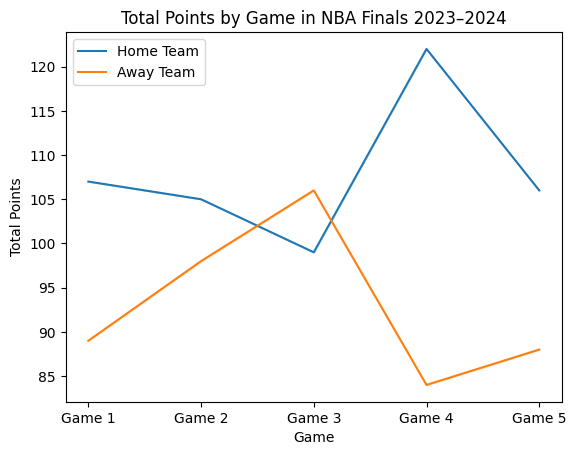

In [495]:
# Compare Home Team and Away Team over matches
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_final_combined, x='Game', y='scores.home.total', label='Home Team')
sns.lineplot(data=df_final_combined, x='Game', y='scores.away.total', label='Away Team')
plt.title('Total Points by Game in NBA Finals 2023–2024')
plt.xlabel('Game')
plt.ylabel('Total Points')
plt.legend()
plt.show()

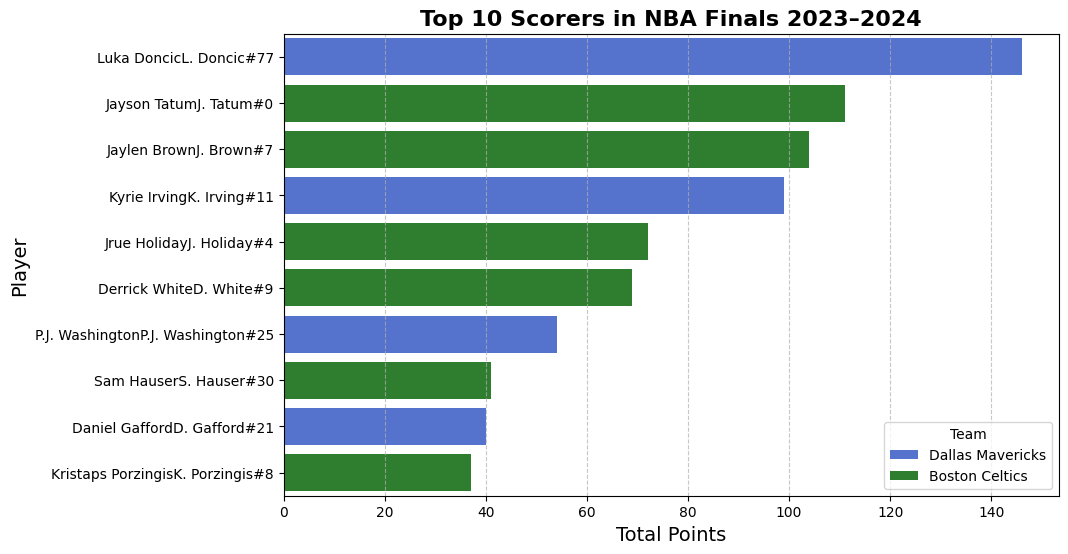

In [496]:
# Top 10 players with the most points in the series
import matplotlib.pyplot as plt
import seaborn as sns

top_scorers = df_final_combined.groupby(['Player', 'Team'])['PTS'].sum().sort_values(ascending=False).head(10).reset_index()

team_colors = {
    'Dallas Mavericks': 'royalblue',
    'Boston Celtics': 'forestgreen'
}


plt.figure(figsize=(10, 6))
sns.barplot(x='PTS', y='Player', data=top_scorers, hue='Team', palette=team_colors, dodge=False)

plt.title('Top 10 Scorers in NBA Finals 2023–2024', fontsize=16, fontweight='bold')
plt.xlabel('Total Points', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.legend(title='Team')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


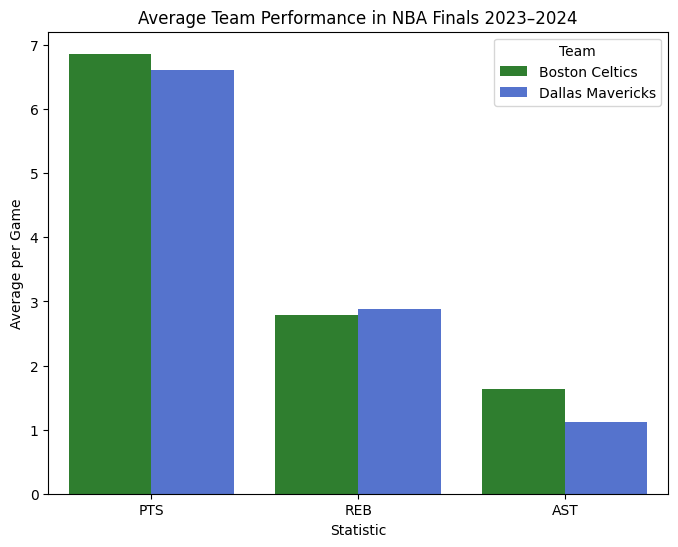

In [497]:
# Compare "Points", "Rebound", "Assist" index in 2 teams
team_stats = df_final_combined.groupby('Team')[['PTS', 'REB', 'AST']].mean().reset_index().melt(id_vars='Team')
palette = {'Boston Celtics':'forestgreen', 'Dallas Mavericks':'royalblue'}
plt.figure(figsize=(8, 6))
sns.barplot(data=team_stats, x='variable', y='value', hue='Team', palette=palette)

plt.title('Average Team Performance in NBA Finals 2023–2024')
plt.xlabel('Statistic')
plt.ylabel('Average per Game')
plt.legend(title='Team')
plt.show()


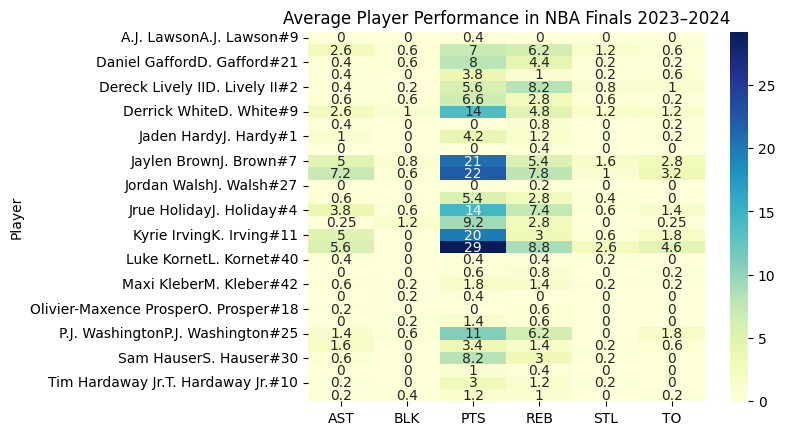

In [498]:
# Average Performance in final series
heatmap_data = df_final_combined.pivot_table(index='Player', values=['PTS', 'REB', 'AST', 'STL', 'BLK', "TO"], aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Average Player Performance in NBA Finals 2023–2024')
plt.show()

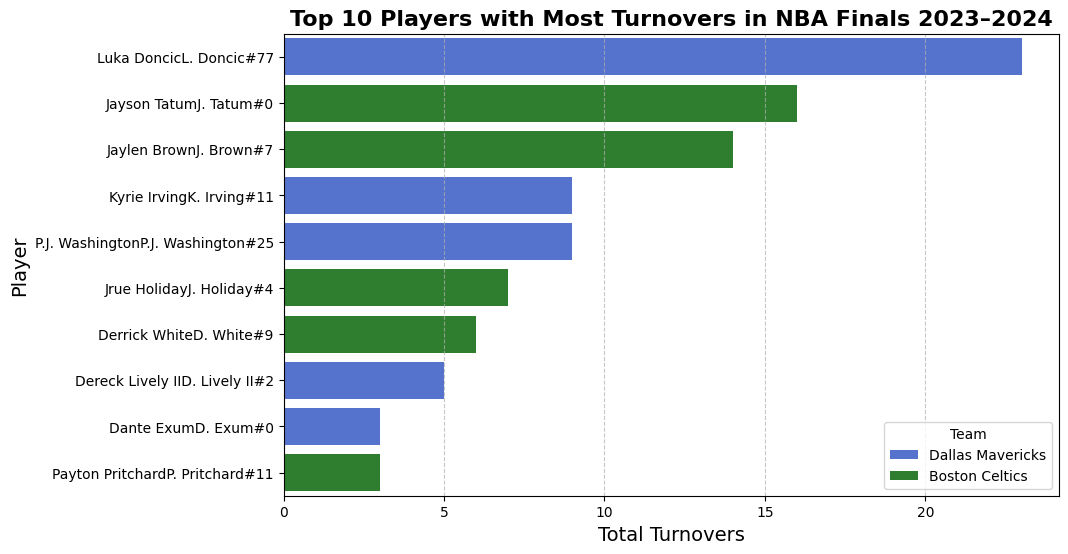

In [499]:
# Top Player have the most turn over
top_to_players = df_final_combined.groupby(['Player', 'Team'])['TO'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='TO',
    y='Player',
    data=top_to_players,
    hue='Team',
    palette=team_colors,
    dodge=False
)
plt.title('Top 10 Players with Most Turnovers in NBA Finals 2023–2024', fontsize=16, fontweight='bold')
plt.xlabel('Total Turnovers', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.legend(title='Team')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-500-e8537926ceb1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_to.index, y=team_to.values, palette=palette)


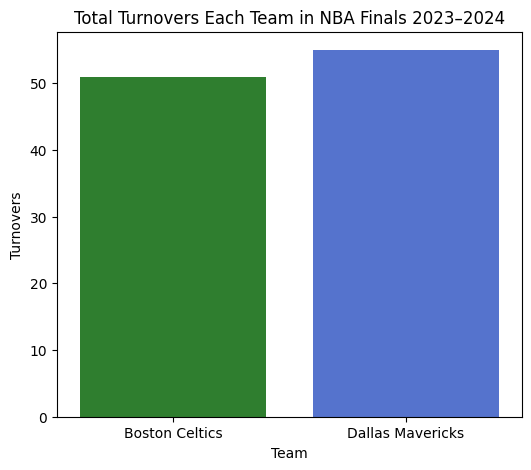

In [500]:
# Which team has the most turn over
team_to = df_final_combined.groupby('Team')['TO'].sum()

plt.figure(figsize=(6,5))
sns.barplot(x=team_to.index, y=team_to.values, palette=palette)
plt.title('Total Turnovers Each Team in NBA Finals 2023–2024')
plt.ylabel('Turnovers')
plt.xlabel('Team')
plt.show()

## 7. OOP Principles

In [501]:
class Player:
    def __init__(self, name, team):
        self.name = name
        self.team = team
        self.stats = []

    def add_game_stats(self, game, pts, reb, ast, stl, blk, turnovers):
        self.stats.append({
            'Game': game,
            'PTS': pts,
            'REB': reb,
            'AST': ast,
            'STL': stl,
            'BLK': blk,
            'TO': turnovers
        })

    def total_points(self):
        return sum(game['PTS'] for game in self.stats)

    def average_points(self):
        return self.total_points() / len(self.stats)


In [502]:
class Team:
    def __init__(self, name):
        self.name = name
        self.players = []

    def add_player(self, player):
        self.players.append(player)

    def team_total_points(self):
        return sum(player.total_points() for player in self.players)


In [503]:
class Game:
    def __init__(self, game_number, date, venue, home_team, away_team, home_score, away_score):
        self.game_number = game_number
        self.date = date
        self.venue = venue
        self.home_team = home_team
        self.away_team = away_team
        self.home_score = home_score
        self.away_score = away_score


In [504]:
class Series:
    def __init__(self, year, team1, team2):
        self.year = year
        self.team1 = team1
        self.team2 = team2
        self.games = []

    def add_game(self, game):
        self.games.append(game)

    def series_winner(self):
        team1_wins = sum(
            1 for game in self.games
            if (game.home_team == self.team1.name and game.home_score > game.away_score)
            or (game.away_team == self.team1.name and game.away_score > game.home_score)
        )
        team2_wins = len(self.games) - team1_wins

        if team1_wins > team2_wins:
            return self.team1.name
        else:
            return self.team2.name

In [505]:
import pandas as pd

df_final_combined = pd.read_csv('Combine_Full_Series.csv')

team1 = Team('Dallas Mavericks')
team2 = Team('Boston Celtics')

nba_series = Series(2024, team1, team2)

players_dict = {}

for _, row in df_final_combined.iterrows():
    player_name = row['Player']
    team_name = row['Team']
    game_number = row['Game']
    pts, reb, ast, stl, blk, to = row['PTS'], row['REB'], row['AST'], row['STL'], row['BLK'], row['TO']

    if player_name not in players_dict:
        new_player = Player(player_name, team_name)
        players_dict[player_name] = new_player

        if team_name == team1.name:
            team1.add_player(new_player)
        else:
            team2.add_player(new_player)
    players_dict[player_name].add_game_stats(game_number, pts, reb, ast, stl, blk, to)


In [506]:
df_api = df_api.sort_values('date').reset_index(drop=True)

for idx, row in df_api.iterrows():
    game = Game(
        game_number=f"Game {idx + 1}",
        date=row['date'],
        venue=row['venue'],
        home_team=row['teams.home.name'],
        away_team=row['teams.away.name'],
        home_score=row['scores.home.total'],
        away_score=row['scores.away.total']
    )
    nba_series.add_game(game)


In [507]:
print(f"Player in {team1.name}: {[player.name for player in team1.players]}")
print(f"Player in {team2.name}: {[player.name for player in team2.players]}")

team1_series_wins = 0
team2_series_wins = 0

for game in nba_series.games:
    if game.home_score > game.away_score:
        winner = game.home_team
    else:
        winner = game.away_team

    if winner == team1.name:
        team1_series_wins += 1
    else:
        team2_series_wins += 1

    print(f"{game.game_number}: {game.home_team} vs {game.away_team} | Score: {game.home_score}-{game.away_score} | Winner: {winner}")

series_winner = nba_series.series_winner()
print(f"\n Series Winner: {series_winner} ({team1_series_wins}-{team2_series_wins})")


Player in Dallas Mavericks: ['P.J. WashingtonP.J. Washington#25', 'Derrick Jones Jr.D. Jones Jr.#55', 'Daniel GaffordD. Gafford#21', 'Kyrie IrvingK. Irving#11', 'Luka DoncicL. Doncic#77', 'Maxi KleberM. Kleber#42', 'Tim Hardaway Jr.T. Hardaway Jr.#10', 'Dwight PowellD. Powell#7', 'Dereck Lively IID. Lively II#2', 'Josh GreenJ. Green#8', 'Dante ExumD. Exum#0', 'Jaden HardyJ. Hardy#1', 'Markieff MorrisM. Morris#88', 'Olivier-Maxence ProsperO. Prosper#18', 'A.J. LawsonA.J. Lawson#9', 'Team Maverick Total']
Player in Boston Celtics: ['Jayson TatumJ. Tatum#0', 'Al HorfordA. Horford#42', 'Jrue HolidayJ. Holiday#4', 'Derrick WhiteD. White#9', 'Jaylen BrownJ. Brown#7', 'Sam HauserS. Hauser#30', 'Oshae BrissettO. Brissett#12', 'Luke KornetL. Kornet#40', 'Kristaps PorzingisK. Porzingis#8', 'Payton PritchardP. Pritchard#11', 'Svi MykhailiukS. Mykhailiuk#50', 'Xavier TillmanX. Tillman#26', 'Neemias QuetaN. Queta#88', 'Jaden SpringerJ. Springer#44', 'Jordan WalshJ. Walsh#27', 'Team celtics Total', 

## 9. Unit Testing

In [508]:
import unittest

class TestPlayer(unittest.TestCase):

    def setUp(self):
        self.player = Player("Luka Doncic", "Dallas Mavericks")
        self.player.add_game_stats("Game 1", 30, 10, 8, 2, 1, 4)
        self.player.add_game_stats("Game 2", 25, 9, 7, 1, 0, 3)

    def test_total_points(self):
        self.assertEqual(self.player.total_points(), 55)

    def test_average_points(self):
        self.assertEqual(self.player.average_points(), 27.5)

    def test_number_of_games(self):
        self.assertEqual(len(self.player.stats), 2)

unittest.main(argv=[''], verbosity=2, exit=False)


test_game_attributes (__main__.TestGame.test_game_attributes) ... ok
test_average_points (__main__.TestPlayer.test_average_points) ... ok
test_number_of_games (__main__.TestPlayer.test_number_of_games) ... ok
test_total_points (__main__.TestPlayer.test_total_points) ... ok
test_number_of_games (__main__.TestSeries.test_number_of_games) ... ok
test_series_winner (__main__.TestSeries.test_series_winner) ... ok
test_add_player (__main__.TestTeam.test_add_player) ... ok
test_team_total_points (__main__.TestTeam.test_team_total_points) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.007s

OK


In [509]:
import unittest

class TestTeam(unittest.TestCase):

    def setUp(self):
        self.team = Team("Dallas Mavericks")
        player1 = Player("Luka Doncic", "Dallas Mavericks")
        player2 = Player("Kyrie Irving", "Dallas Mavericks")

        player1.add_game_stats("Game 1", 30, 10, 8, 2, 1, 4)
        player2.add_game_stats("Game 1", 25, 6, 7, 1, 0, 3)

        self.team.add_player(player1)
        self.team.add_player(player2)

    def test_add_player(self):
        self.assertEqual(len(self.team.players), 2)

    def test_team_total_points(self):
        self.assertEqual(self.team.team_total_points(), 55)

unittest.main(argv=[''], verbosity=2, exit=False)

test_game_attributes (__main__.TestGame.test_game_attributes) ... ok
test_average_points (__main__.TestPlayer.test_average_points) ... ok
test_number_of_games (__main__.TestPlayer.test_number_of_games) ... ok
test_total_points (__main__.TestPlayer.test_total_points) ... ok
test_number_of_games (__main__.TestSeries.test_number_of_games) ... ok
test_series_winner (__main__.TestSeries.test_series_winner) ... ok
test_add_player (__main__.TestTeam.test_add_player) ... ok
test_team_total_points (__main__.TestTeam.test_team_total_points) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.006s

OK


In [510]:
import unittest

class TestGame(unittest.TestCase):

    def setUp(self):
        self.game = Game("Game 1", "2024-06-01", "TD Garden", "Boston Celtics", "Dallas Mavericks", 107, 113)

    def test_game_attributes(self):
        self.assertEqual(self.game.game_number, "Game 1")
        self.assertEqual(self.game.venue, "TD Garden")
        self.assertEqual(self.game.home_team, "Boston Celtics")
        self.assertEqual(self.game.away_team, "Dallas Mavericks")
        self.assertEqual(self.game.home_score, 107)
        self.assertEqual(self.game.away_score, 113)

unittest.main(argv=[''], verbosity=2, exit=False)

test_game_attributes (__main__.TestGame.test_game_attributes) ... ok
test_average_points (__main__.TestPlayer.test_average_points) ... ok
test_number_of_games (__main__.TestPlayer.test_number_of_games) ... ok
test_total_points (__main__.TestPlayer.test_total_points) ... ok
test_number_of_games (__main__.TestSeries.test_number_of_games) ... ok
test_series_winner (__main__.TestSeries.test_series_winner) ... ok
test_add_player (__main__.TestTeam.test_add_player) ... ok
test_team_total_points (__main__.TestTeam.test_team_total_points) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.006s

OK


In [511]:
import unittest

class TestSeries(unittest.TestCase):

    def setUp(self):
        self.team1 = Team("Dallas Mavericks")
        self.team2 = Team("Boston Celtics")
        self.series = Series(2024, self.team1, self.team2)

        game1 = Game("Game 1", "2024-06-01", "TD Garden", "Boston Celtics", "Dallas Mavericks", 107, 113)
        game2 = Game("Game 2", "2024-06-03", "TD Garden", "Boston Celtics", "Dallas Mavericks", 115, 120)
        game3 = Game("Game 3", "2024-06-05", "AAC", "Dallas Mavericks", "Boston Celtics", 105, 100)

        self.series.add_game(game1)
        self.series.add_game(game2)
        self.series.add_game(game3)

    def test_series_winner(self):
        self.assertEqual(self.series.series_winner(), "Dallas Mavericks")

    def test_number_of_games(self):
        self.assertEqual(len(self.series.games), 3)

unittest.main(argv=[''], verbosity=2, exit=False)


test_game_attributes (__main__.TestGame.test_game_attributes) ... ok
test_average_points (__main__.TestPlayer.test_average_points) ... ok
test_number_of_games (__main__.TestPlayer.test_number_of_games) ... ok
test_total_points (__main__.TestPlayer.test_total_points) ... ok
test_number_of_games (__main__.TestSeries.test_number_of_games) ... ok
test_series_winner (__main__.TestSeries.test_series_winner) ... ok
test_add_player (__main__.TestTeam.test_add_player) ... ok
test_team_total_points (__main__.TestTeam.test_team_total_points) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.006s

OK
